<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2024 - Homework 01</h1>

<h3 style="color:blue">2024-03-25</h3>

<h1 style="color:blue">Instructions</h1>

### Submissions: 

1. By **groups** of _about_ three students (meaning: two is OK, four is not advisable but possible. Individual homeworks will also be accepted but collaborative work is preferable). 

2. Please send me an **email** with the team members names by March 31.

3. Only **one copy** of each group's work must be uploaded (by any member).

4. **Full names** and **email address** of all team members must appear in the header. 

### Format: 

A Jupyter or an Rmd **notebook** with a **header** clearly stating the names of all contributors. 

### Documentation: 

1. Comments **in code cells** (e.g., meaning of variables, parameters, purpose of functions) are necessary but not sufficient.

2. You are expected to give full explanations of steps taken in your solution (in **Markdown cells**), as well as discussion of results and their meaning.

3. Do not be afraid of being too verbose or too elementary, explain as if to someone learning.

### External sources

Getting _inspiration_ from any book, document, blog, web page, even mimicking solutions given in there, is **allowed and encouraged,** provided you give a **proper reference,** understand every such material, and explain it in you own words, even more exhaustively. Do not **copy/paste literally large chunks of code** I will detect it, believe me, even missing source reference. Bleak consequences.

### Deadline:

Completed assignments are due on **Monday, April 15**. They are to be uploaded to the Virtual Campus.

<h1 style="color:blue">Exercises</h1>

### TEAM MEMBERS
- Alfaro Checa Brandon Jersai bralfarc7@alumnes.ub.edu
- Eddie Conti econtico8@alumnes.ub.edu

## Exercise 1: Placenta previa

This exercise pertains to what we studied in `Binomial.3.Placenta.previa.pub.ipynb`.

1. Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\textrm{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in BDA3 [1]. Do the same for those $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors. 

2. Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$. 

3. Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 1. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.

[1] _Bayesian Data Analysis - Third edition_ **(BDA3),** pag. 37.

### Solution to Exercise 1: Placenta Previa

First of all, we recall that in Germany they found that of a total of 980 placenta previa births, 437 were female and that the proportion of female births in this population is 48.5\%.
In the first part of the exercise we are asked to generate a 95\% credible interval, MAP and posterior expectation estimators, for the unknown parameter assuming a prior distribution $Beta(\alpha,\beta)$ for different values. 

In [1]:
# Observed data
n<-980 
x<-437 # number of female
theta.obs<-x/n # freqeuentist estimator of the parameter theta.
round(theta.obs,3) 

[1] 0.446

Here we define a function to determine the parameters given the sum $a+b$ and the ratio $\frac{a}{a+b}$

In [2]:
# Different parameters for the beta distribution
beta_param <- function(ratio, sum) { # our parameters are a/(a+b) and a+b according to table 2.3
  a<-ratio*sum  
  b<-sum-a
  return(c(a,b)) # we return the vector with containing the two parameters
}

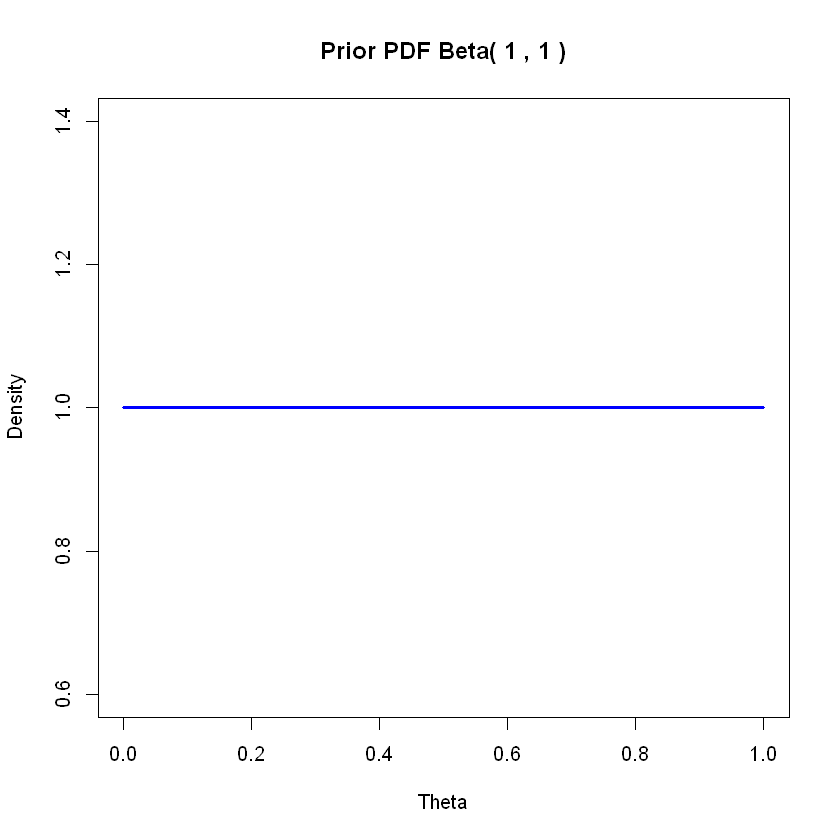

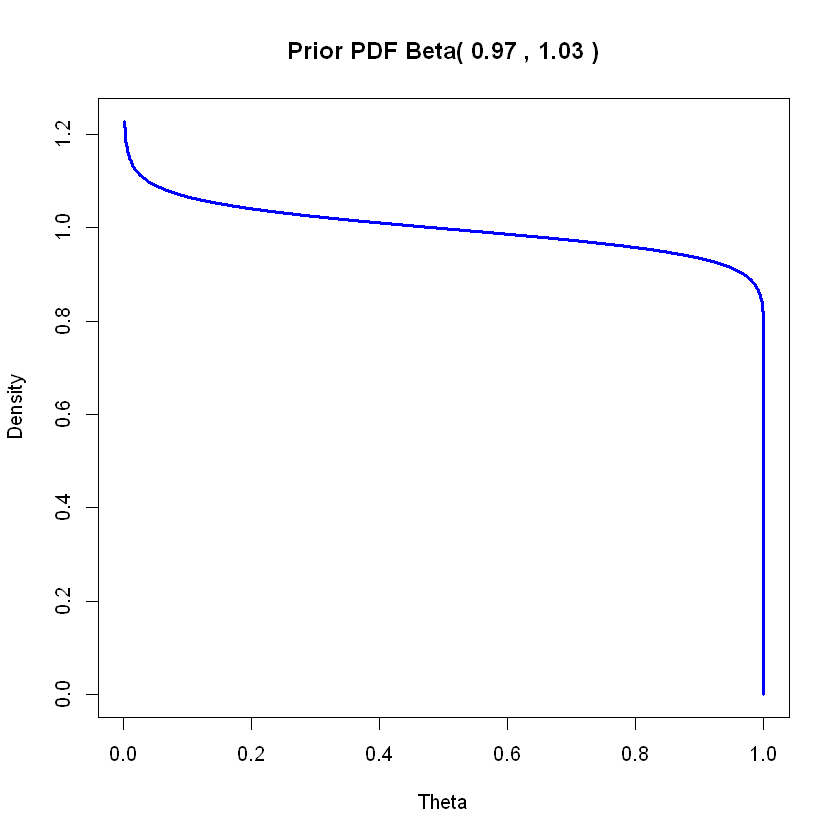

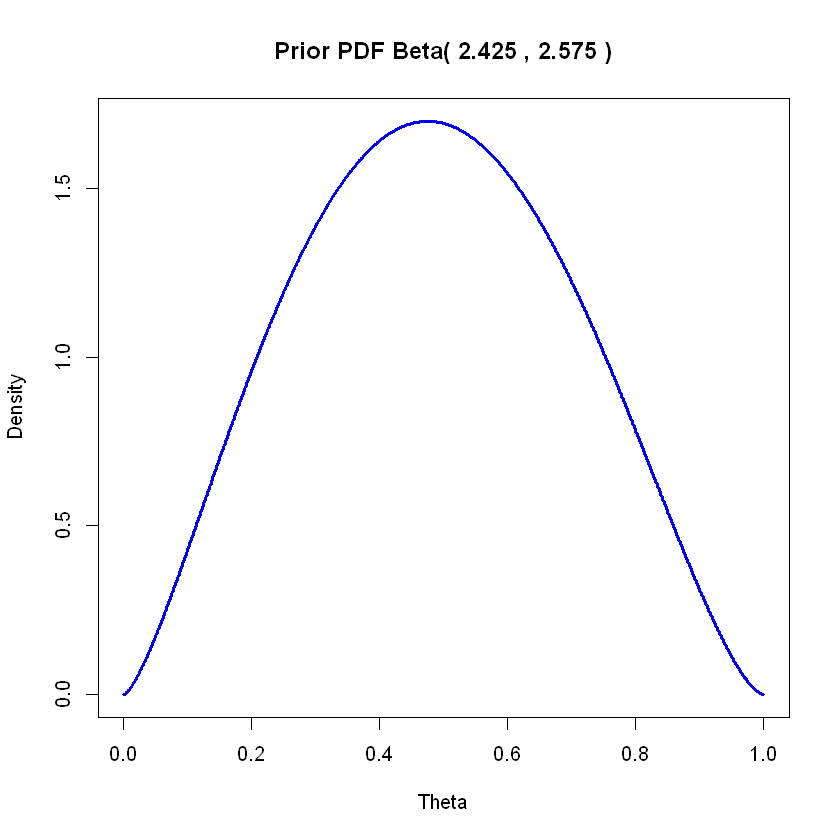

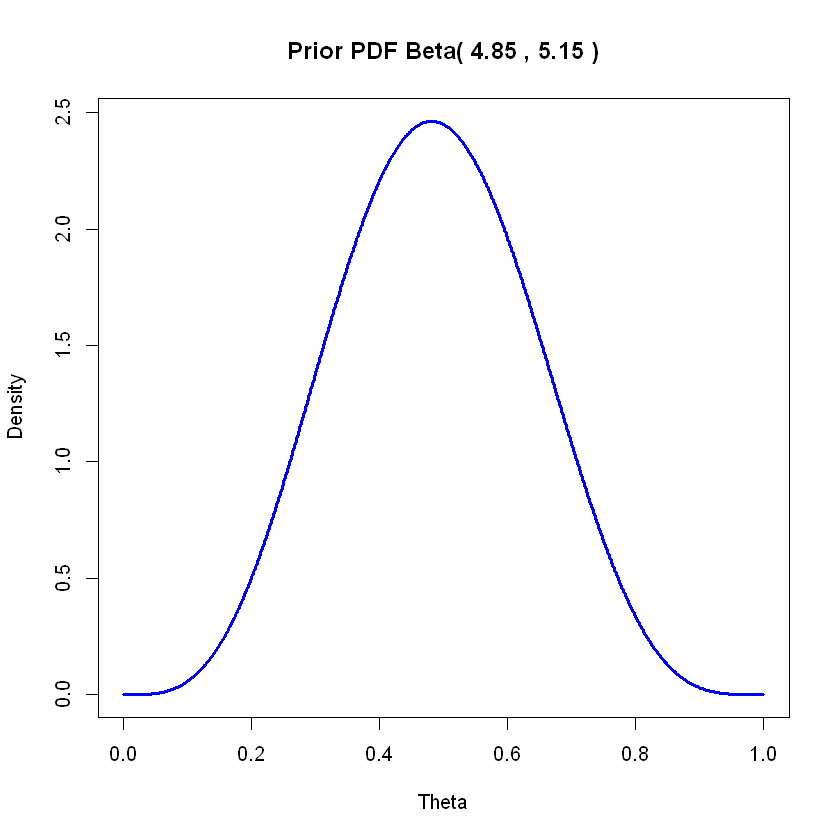

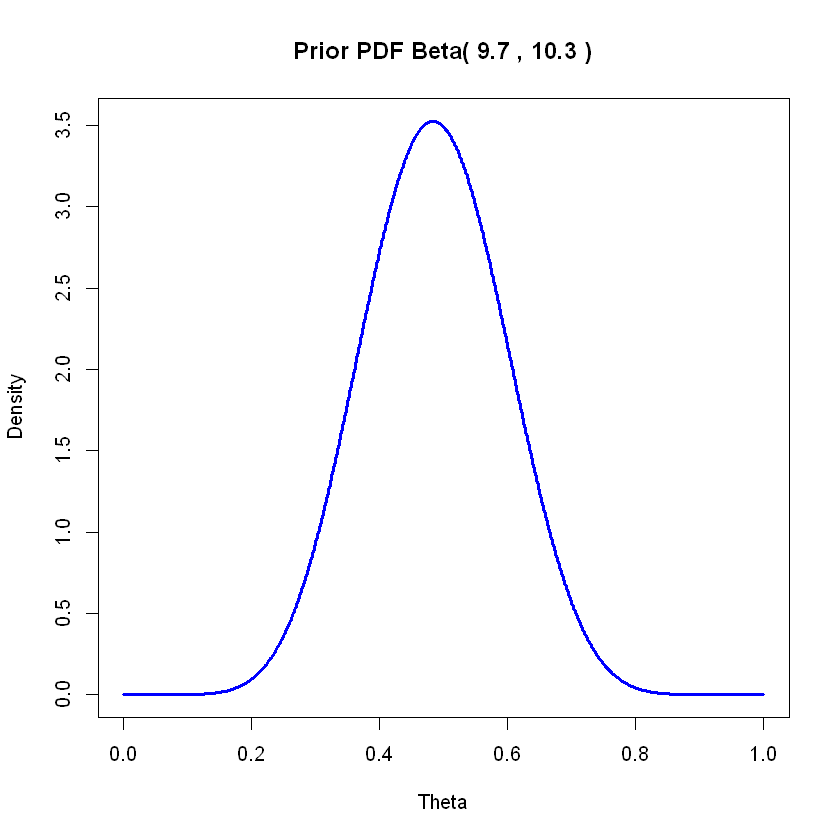

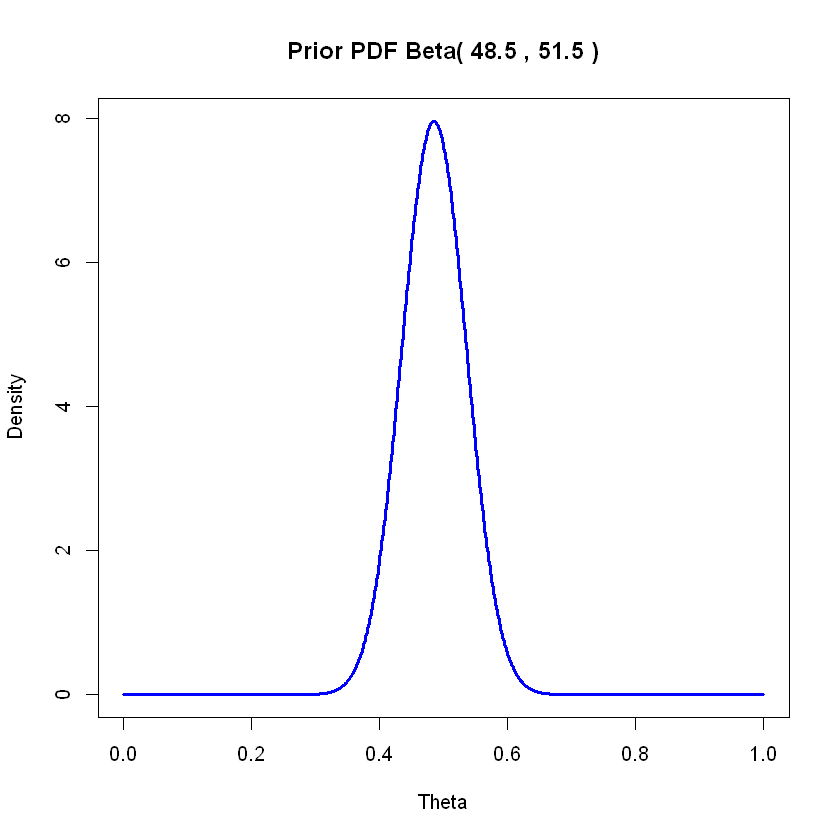

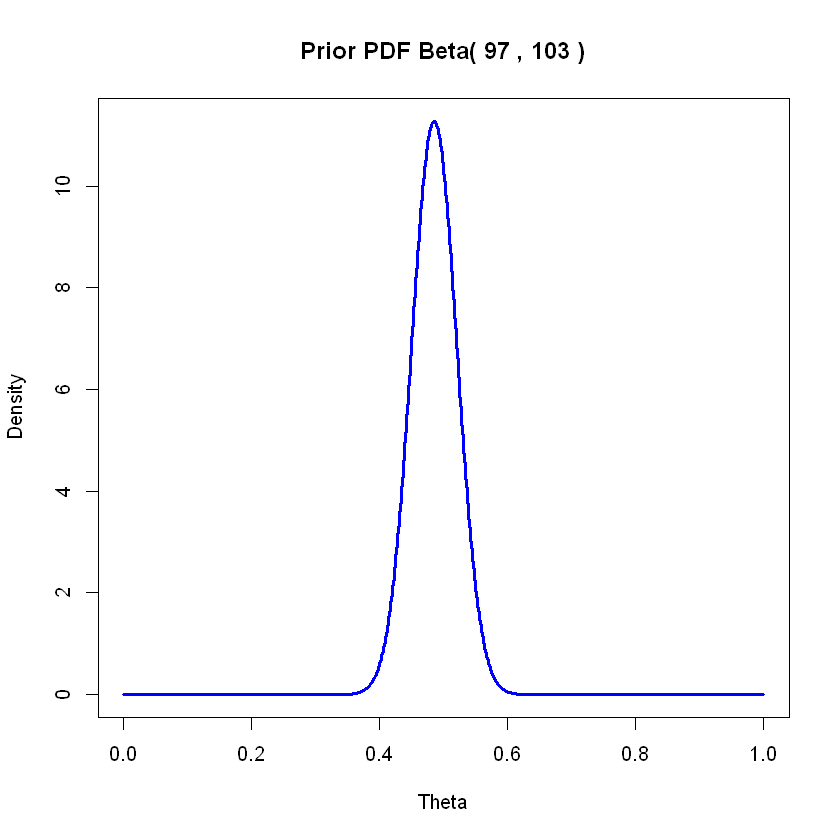

In [7]:
# Prior distributions - beta(a.prior, b.prior)
xs <- seq(0,1,by=0.001)
r <- c(0.5, 0.485, 0.485, 0.485, 0.485, 0.485, 0.485)
s <- c(2, 2, 5, 10, 20, 100, 200)

a.prior <- c()
b.prior <- c()

for (i in 1:length(r)){
    a.prior[i]<- beta_param(r[i],s[i])[1]
    b.prior[i]<-beta_param(r[i],s[i])[2]
}

# Per ciascuna distribuzione prior, genera un plot con una finestra grafica più piccola
for (i in 1:length(a.prior)) {
  plot(xs, dbeta(xs, a.prior[i], b.prior[i]), type = 'l', lwd = 3,
       ylab = "Density", xlab = "Theta",
       main = paste("Prior PDF Beta(", a.prior[i], ",", b.prior[i], ")"),
       col = "blue")
}

### Theoretical introduction

In bayesian Statistics we aim at producing analysis taking into account the uncertainty of our prior beliefs. Throughout the notebook we will both produce results that are analytically correct (in the sense that exists a closed formula for that distribution, for example when working with conjugate families) but also simulated results. First of all, let us clarify the general quantities involved in this project

The prior distribution for the unknown parameter $\theta$ is given by the pdf of $p(\theta)$ for $\theta$ in a certain subset of $\mathbb{R}$. In this case we are working with just a real quantity, but everything may be generalized to vector quantities. When dealing with a population, we have to describe what is the process of generating that population given the parameter. This is called likelihood function and for this first exercise is just 
$$
p(x|\theta)=\theta^{n_1}(1-\theta)^{n-n_1}
$$
i.e. a binomial distribution since we assume that each birth is independent, where $n=980$ and $n_1=437$. From the population, we aim at describing how parameter is affected by these information, and this quantity is encoded in the posterior pdf of $\theta$
$$
    p(\theta|x)=\frac{p(x|\theta)p(\theta)}{f(x)}
$$
where $p(\theta)=Beta(\alpha,\beta)$ or the piecewise linear function $h(t)$ that will be defined afterwards.

Now, it is crucial to underline the importance of conjugate pairs. First of all the definition is straightforward: "Conjugate distribution or conjugate pair means a pair of a sampling distribution and a prior distribution for which the resulting posterior distribution belongs into the same parametric family of distributions than the prior distribution". The parametric family is usually denoted as
$$
\{ f_{Y|\theta}(y|\theta)\,\colon\, \theta \in \Omega  \}.
$$
When we are working with conjugate pairs, we have closed forms for posterior distribution and prior and posterior predictive distribution. In our note we will use this results when our prior distribution for theta is $Beta(\alpha,\beta)$. For example, the un-normalized posterior pdf of the parameter is $Beta(\alpha+n_1,\beta+n-n_1)$. For the posterior predictive pmf, i.e., 
$$
    p(\tilde{x}|x)=\int_{\theta} p(\tilde{x}|\theta)p(\theta|x)\,d\theta
$$
we know that the distribution is a Beta-Binomial distribution. Finally, for the prior pdf we have
$$ 
    p(x)=\int_{\theta} p(x|\theta)p(\theta)\,d\theta =\frac{1}{B(\alpha,\beta)}B(\alpha+n_1,\beta+n-n_1).
$$

However, these results only holds if the prior distribution forms a conjugate pairs. In the case of the function $h(t)$ we need to simulate in order to obtain the same results. The simulation method is straightforward. The general approach is to generate a random sample from the posterior distribution, and use its empirical distribution function as an approximation of the posterior. Let us illustrate an example to clarify the method and then the others will be analogous: if we want to approximate the posterior distribution, for example, we collect a bunch of $\theta$ from the prior distribution, we generate x samples according to the various $\theta$ using the likelihood function $p(x|\theta)$
and then normalize the results. This idea will be used always in the following when simulating quantities, of course in accordance with the formula defining that quantity (prior predictive, posterior predictive or posterior distribution of $\theta$).

Moreover, we recall that the MAP is just
$$
\hat{\theta}_{\mathrm{MLE}}(x) = \underset{\theta}{\operatorname{arg\,max}} \ f(x \mid \theta)
$$
and the expectaction for a $Beta(a,b)$ distribution is just $\displaystyle \frac{a}{a+b}$.

In general, for $Beta(a,b)$ we have closed formulas for the relevant quantities:

![Testo alternativo](quantities.png)


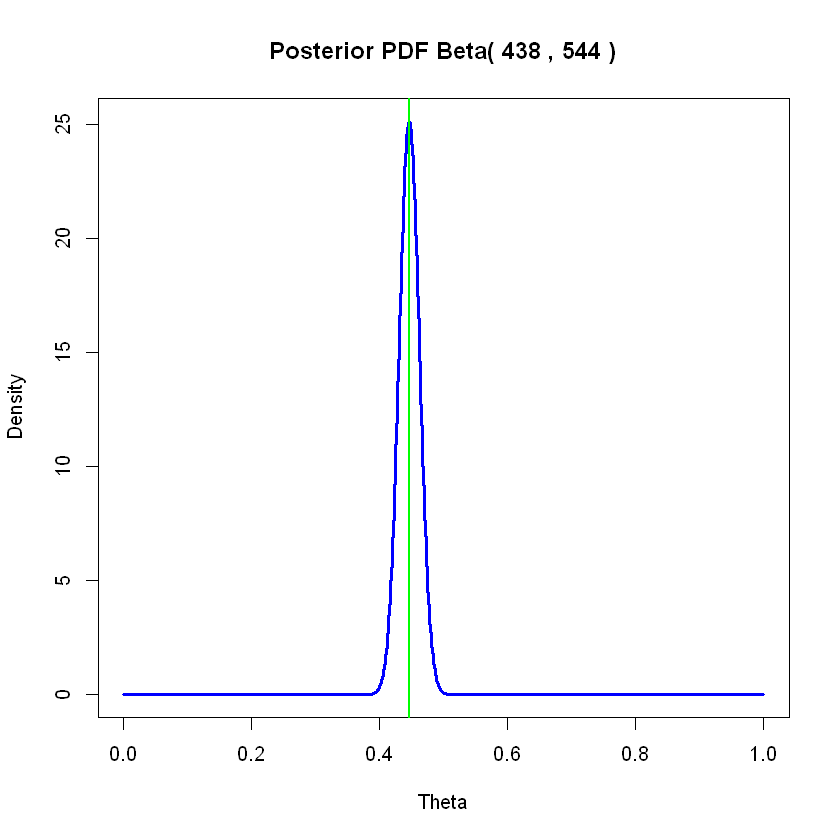

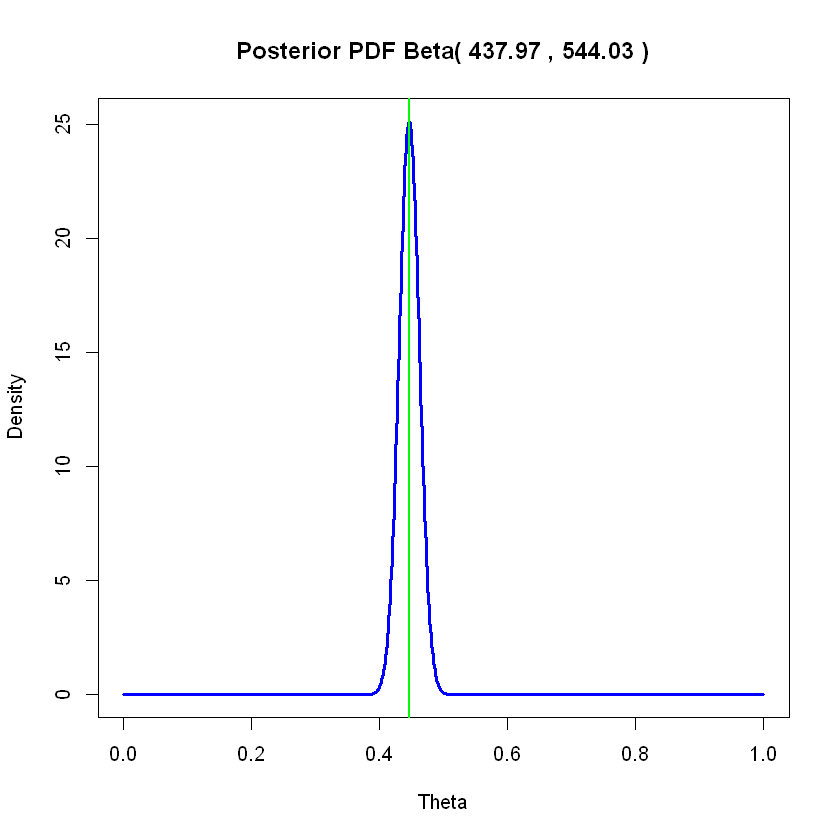

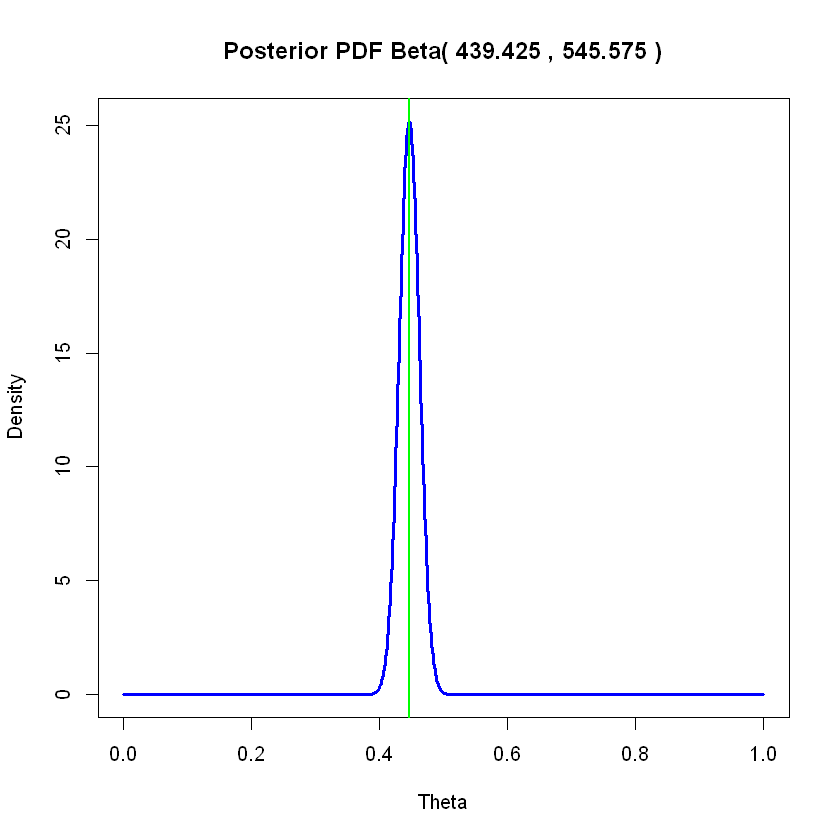

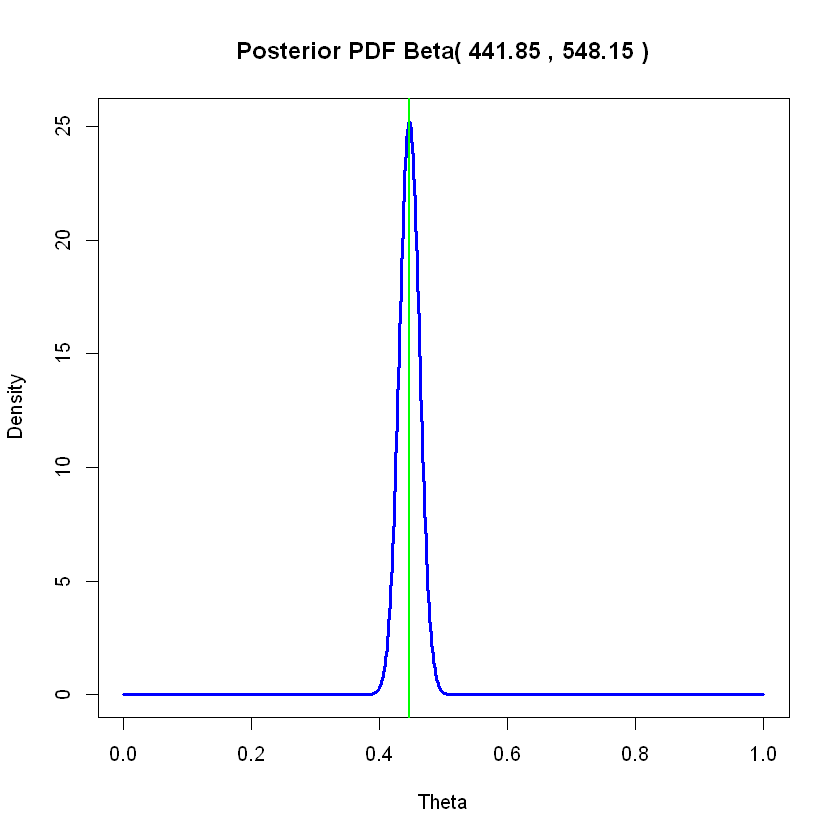

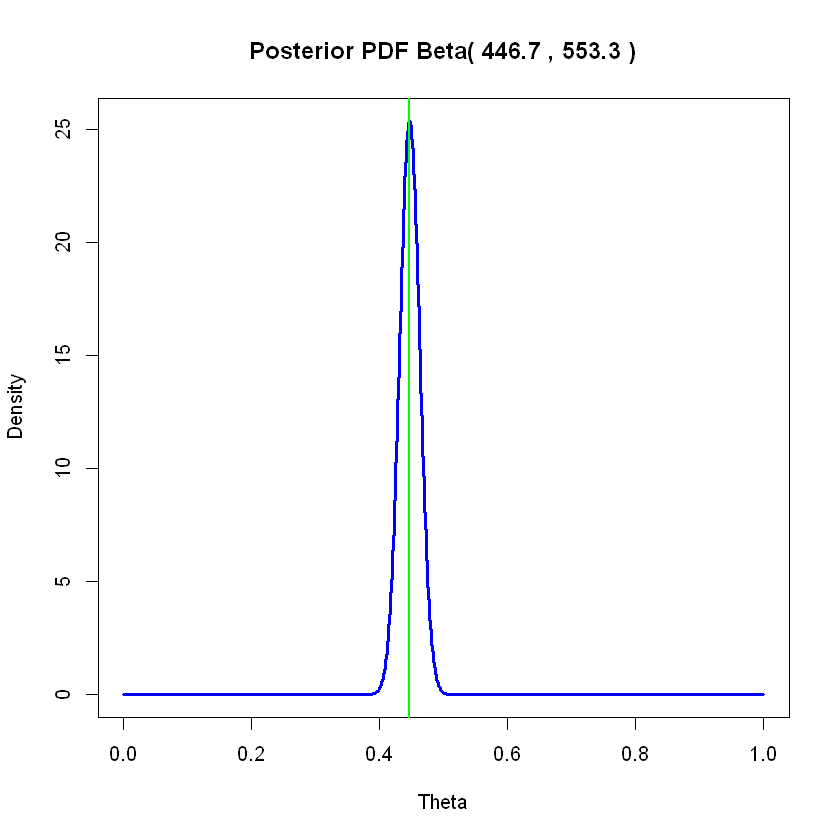

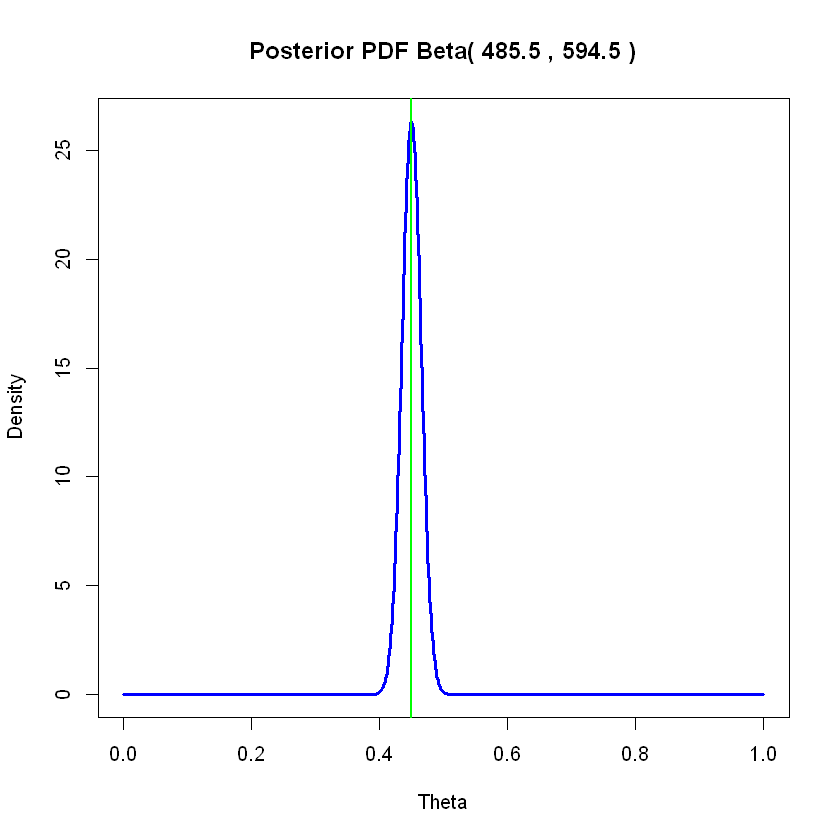

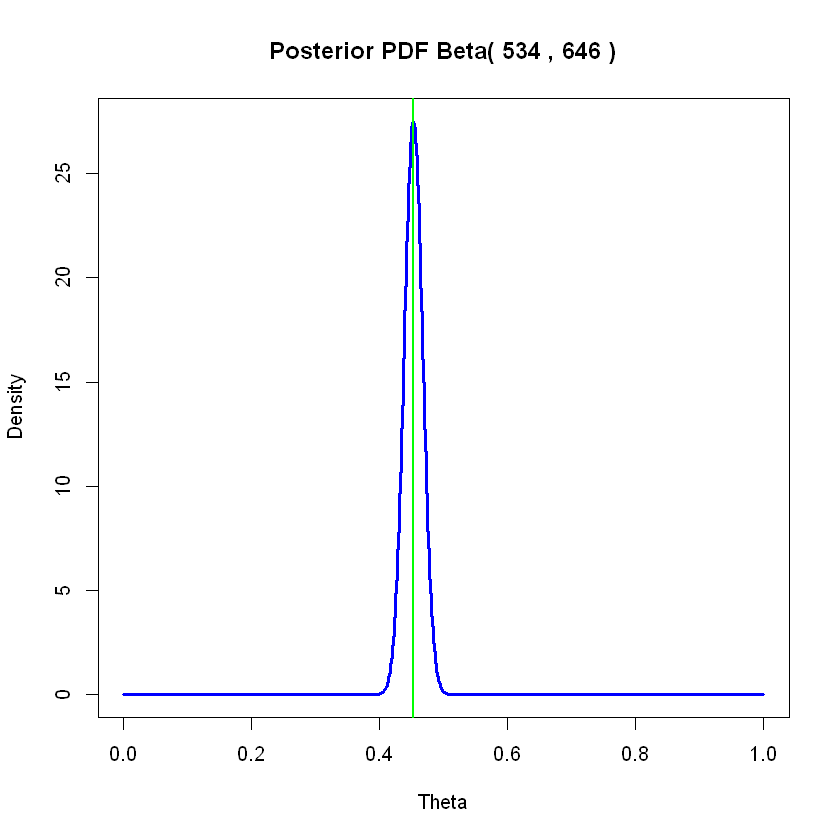

In [9]:
a.post <- a.prior + x
b.post <- b.prior + n - x

for (i in 1:length(a.post)) {
  plot(xs, dbeta(xs, a.post[i], b.post[i]), type = 'l', lwd = 3,
       ylab = "Density", xlab = "Theta",
       main = paste("Posterior PDF Beta(", a.post[i], ",", b.post[i], ")"),
       col = "blue")
  
  # Calculate MAP (Mode)
  mode_values <- (a.post[i] - 1) / (a.post[i] + b.post[i] - 2)
  abline(v=mode_values, lwd = 2, col = 'red') 
    
  # Calculate Posterior expectation estimator (Mean)
  mean_values <- a.post[i]/(a.post[i] + b.post[i])
  abline(v=mean_values, lwd = 2, col = 'green')
}

In [10]:
# 95% CI
lower.bounds <- qbeta(0.025,a.post, b.post)
upper.bounds <- qbeta(0.975,a.post, b.post)
medians <- qbeta(0.5,a.post, b.post)

In [15]:


df <- data.frame(
  a.post,
  b.post,
  lower.bounds,
  upper.bounds,
  medians,
  mode_values,
  mean_values
)

# Format numeric columns to display only x decimals
df[, 1:2] <- lapply(df[, 1:2], function(x) format(round(x, 0), nsmall = 0))
df[, 3:7] <- lapply(df[, 3:7], function(x) format(round(x, 3), nsmall = 3))
                    
print(df)


  a.post b.post lower.bounds upper.bounds medians mode_values mean_values
1    438    544        0.415        0.477   0.446       0.452       0.453
2    438    544        0.415        0.477   0.446       0.452       0.453
3    439    546        0.415        0.477   0.446       0.452       0.453
4    442    548        0.415        0.477   0.446       0.452       0.453
5    447    553        0.416        0.478   0.447       0.452       0.453
6    486    594        0.420        0.479   0.450       0.452       0.453
7    534    646        0.424        0.481   0.453       0.452       0.453


Now we are ready to plot the prior predictive pmf and cdf

In [6]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

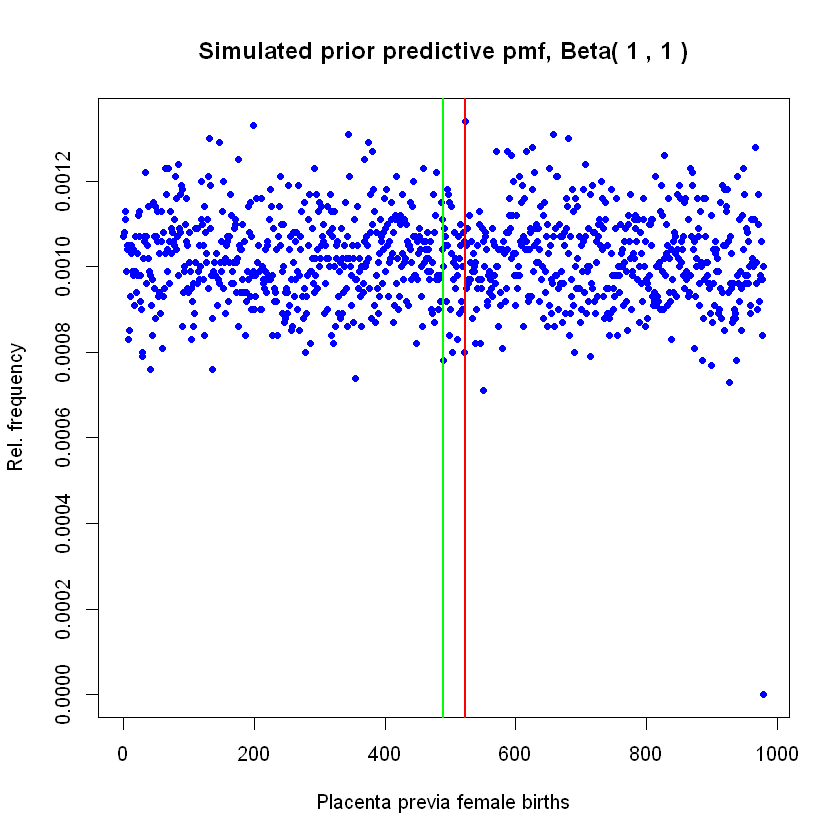

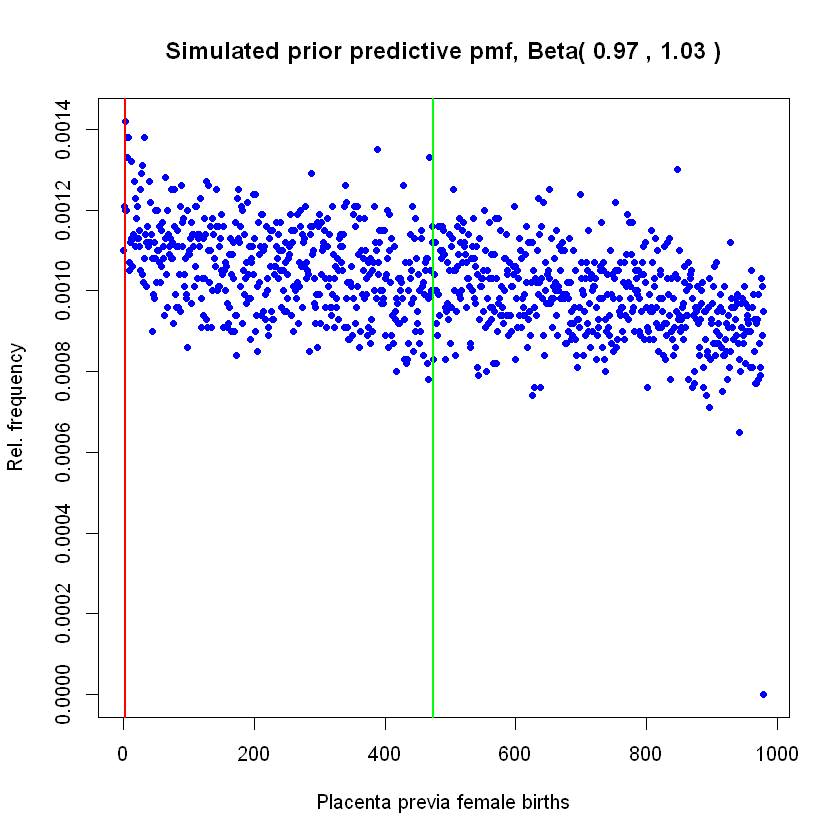

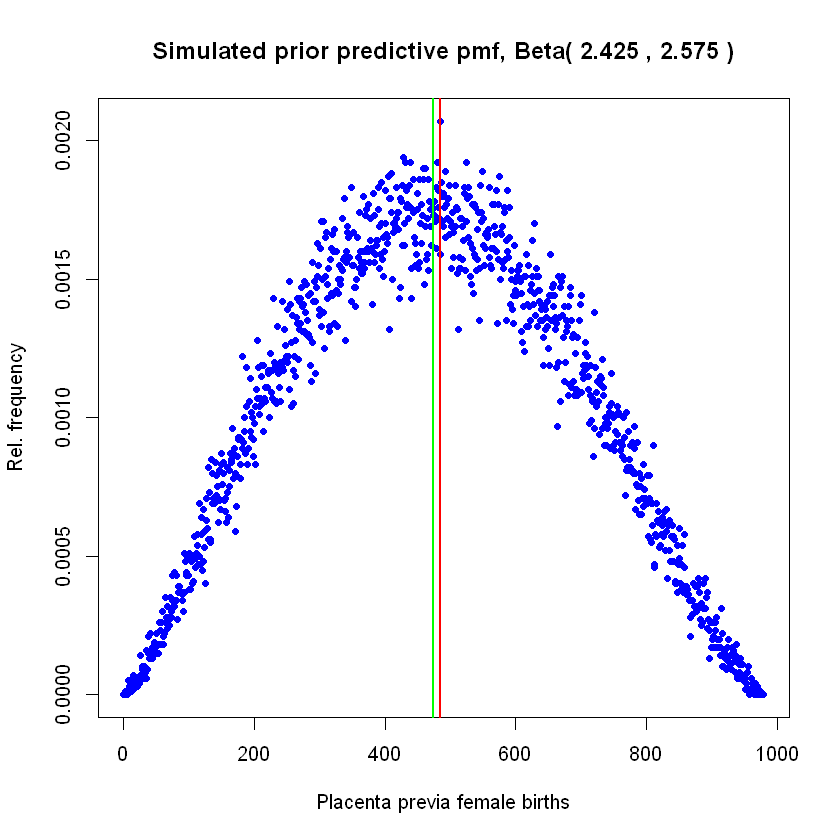

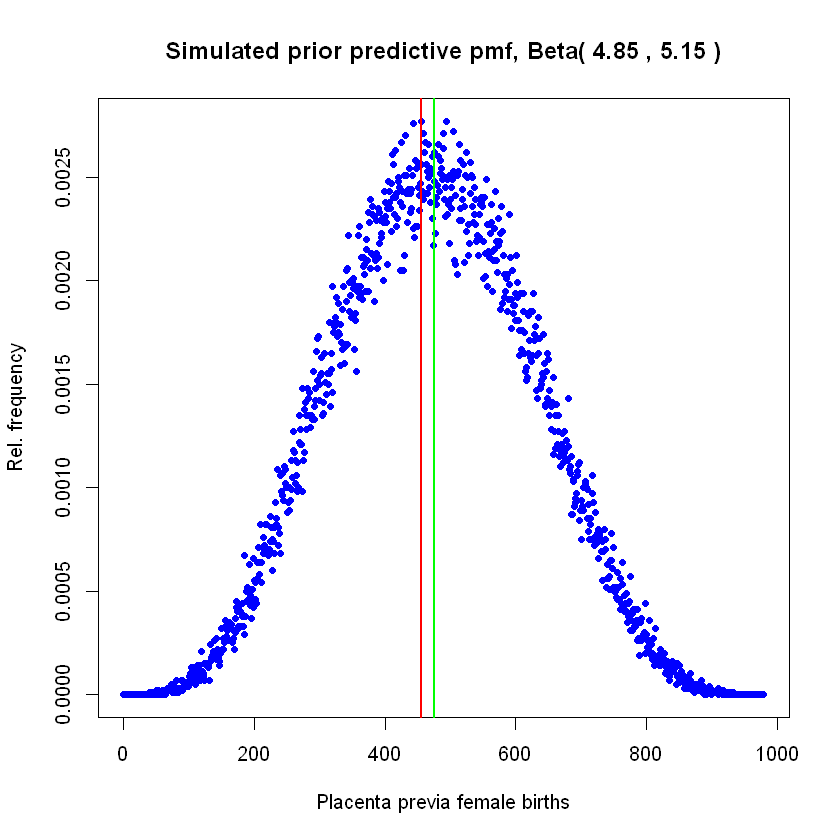

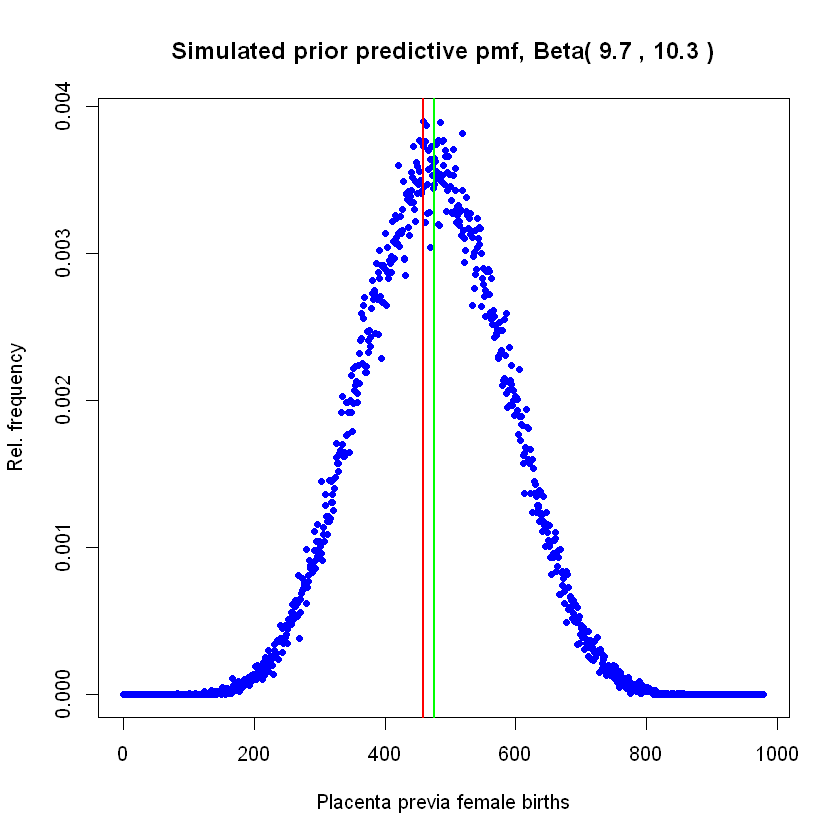

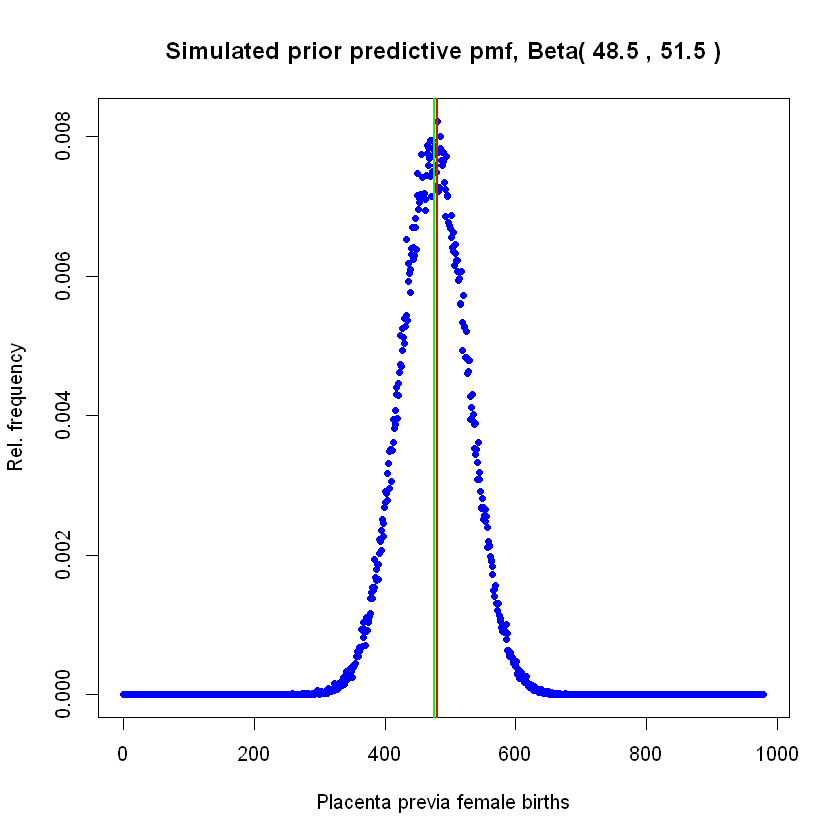

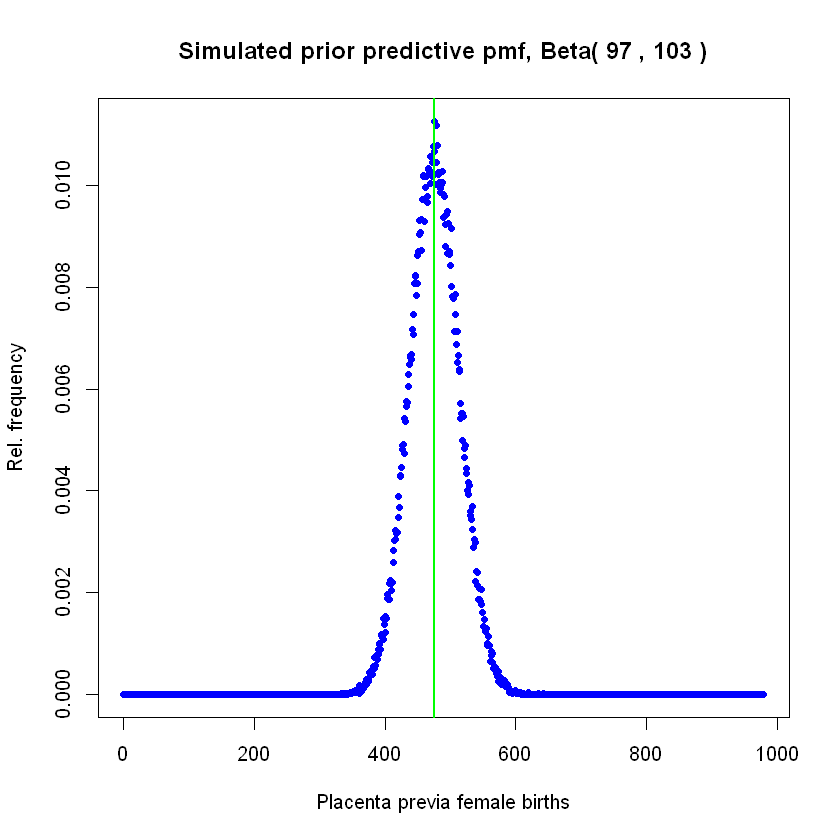

In [18]:
#Prior predictive pmf

#Initialize empty matrices
n <- 100000
thetas <- matrix(0, nrow = n, ncol = length(a.prior))
x <- matrix(0, nrow = n, ncol = length(a.prior))

for (i in 1:length(a.prior)){
    thetas[,i] <- rbeta(n, a.prior[i], b.prior[i])  
    x[,i] <- rbinom(n,980,thetas[,i])
}

# Empirical pmf
f <- matrix(0, nrow = length(0:980), ncol = length(a.prior))
mode_value <- numeric(length(a.prior))
mean_value <- numeric(length(a.prior))

for (j in 1:length(a.prior)){
    X <- 0:980
    F<-rep(0,length(X))
    
    for (i in X){
        F[i]<-sum(x[,j]==X[i])
        }
    f[,j]<-F/n

    plot(X, f[,j], type="p", pch=19, cex=0.8, col="blue",
         main=paste("Simulated prior predictive pmf, Beta(", a.prior[j], ",", b.prior[j],")"), 
         xlab='Placenta previa female births', ylab="Rel. frequency")

    mode_values[j] <- Mode(x[,j])
    abline(v=mode_values[j],lwd = 2, col = 'red') # Mode

    mean_values[j] <- mean(x[,j])
    abline(v=mean_values[j],lwd = 2, col = 'green') # Mean
}


It is clear from the previous plots how the prior distribution will affect the prior predictive shape

And the cdf with the 95% interval

In [19]:
p <- matrix(0, nrow = length(0:981), ncol = length(a.prior))

for (i in 1:length(a.prior)){
    p[,i]<-c(0,cumsum(f[,i])) # cdf
}

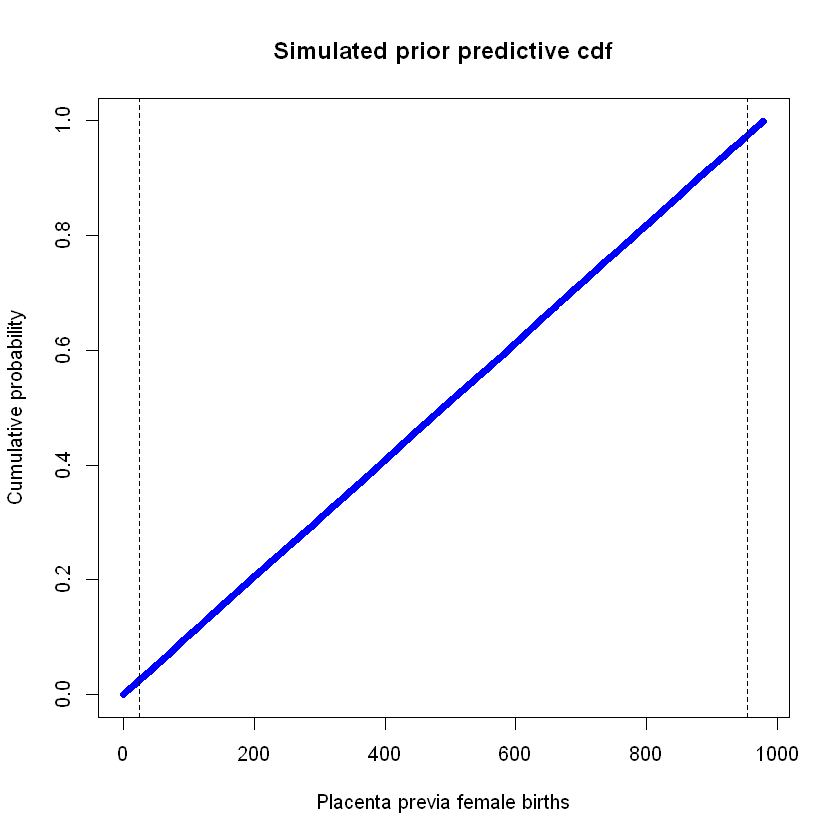

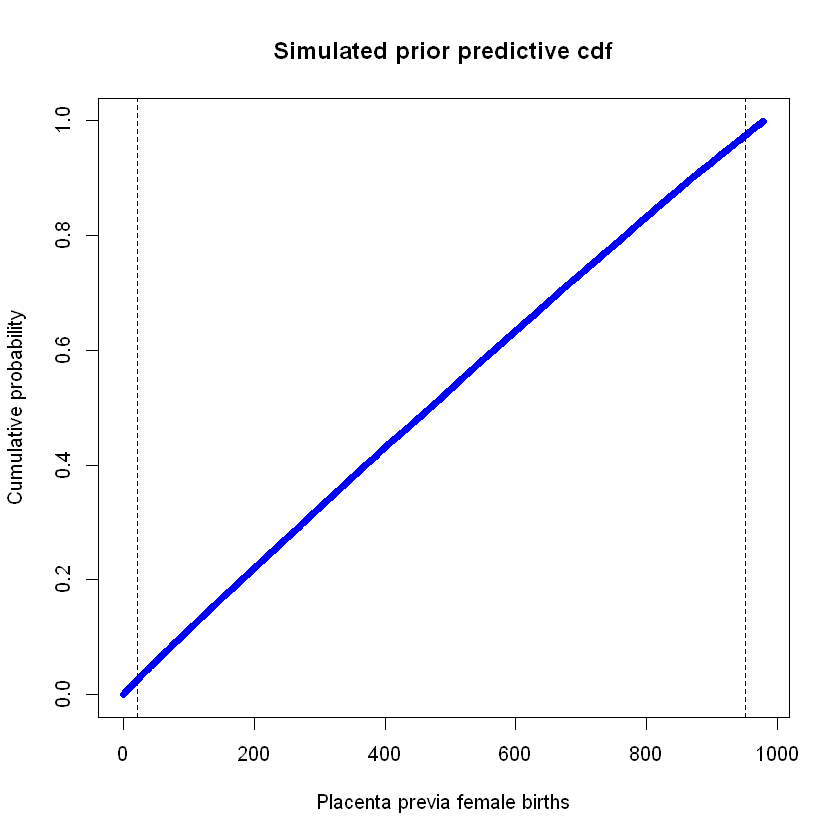

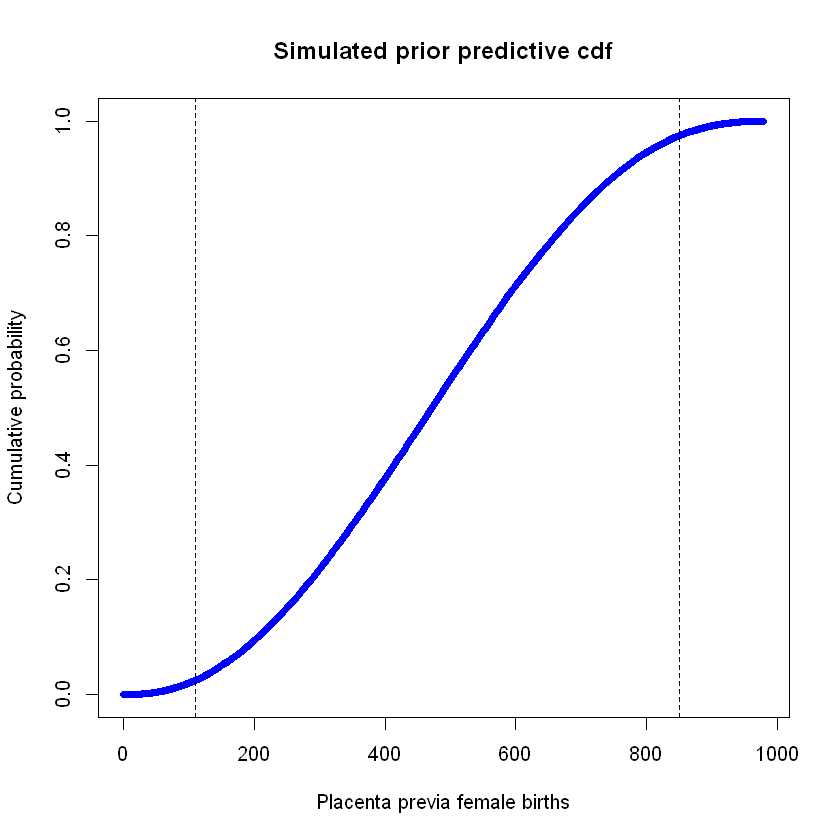

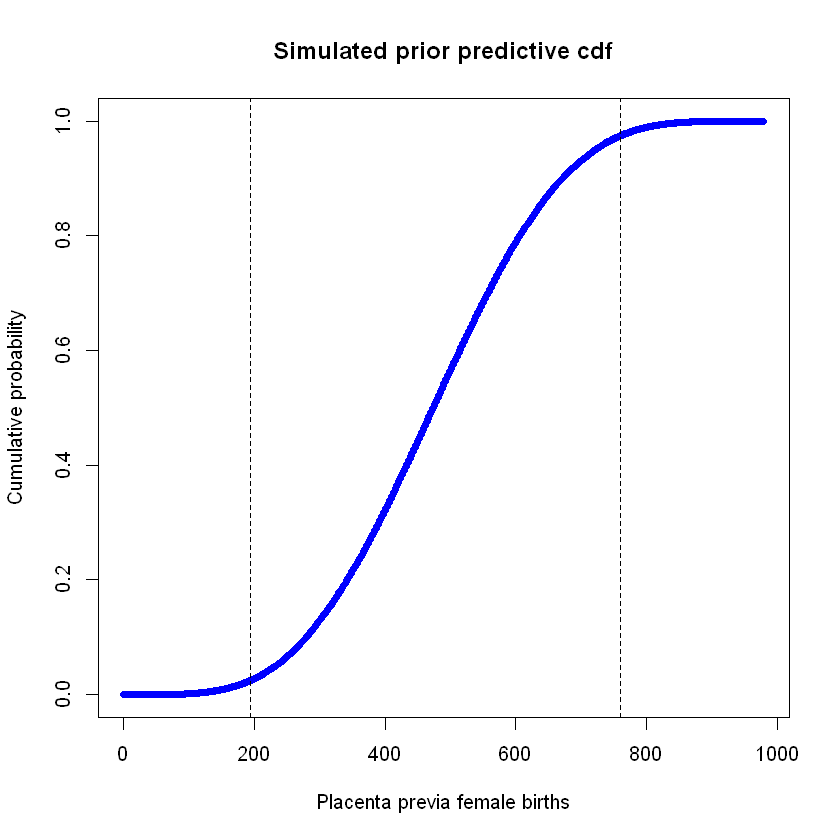

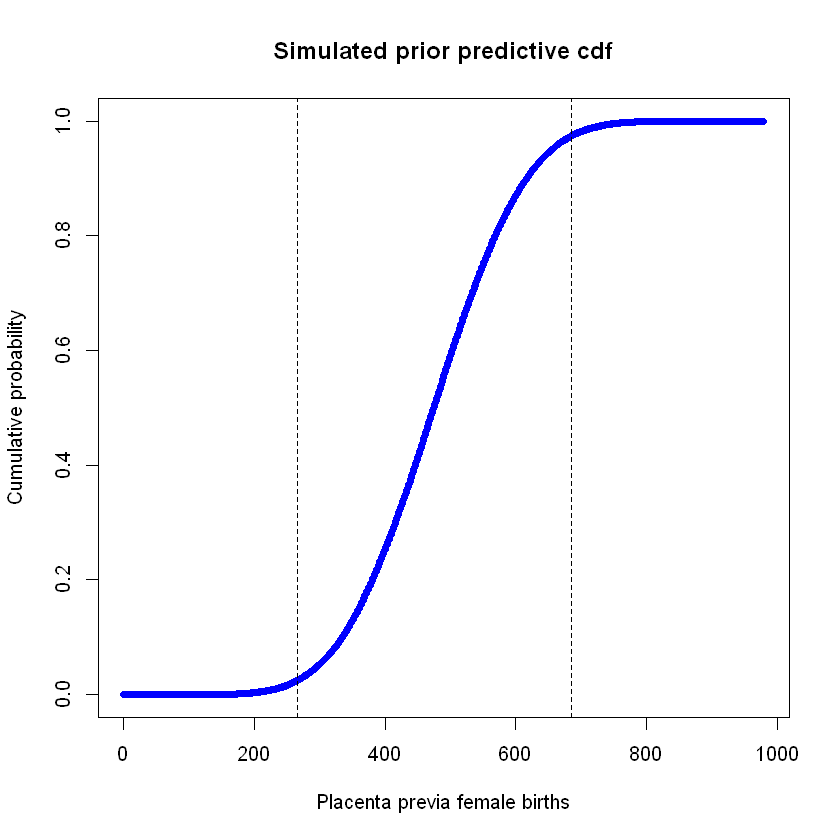

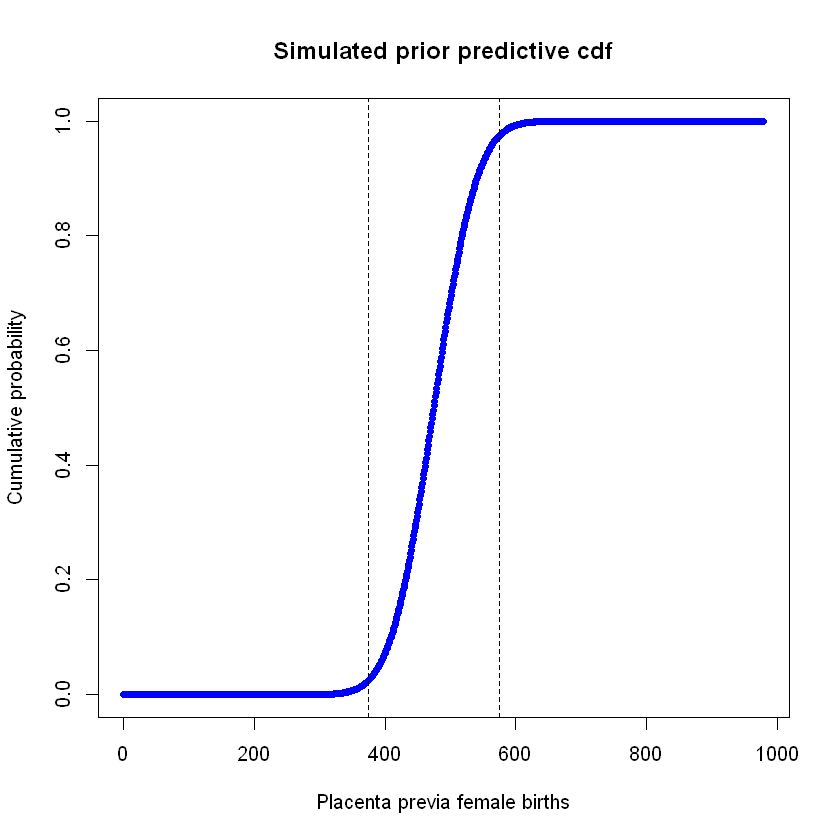

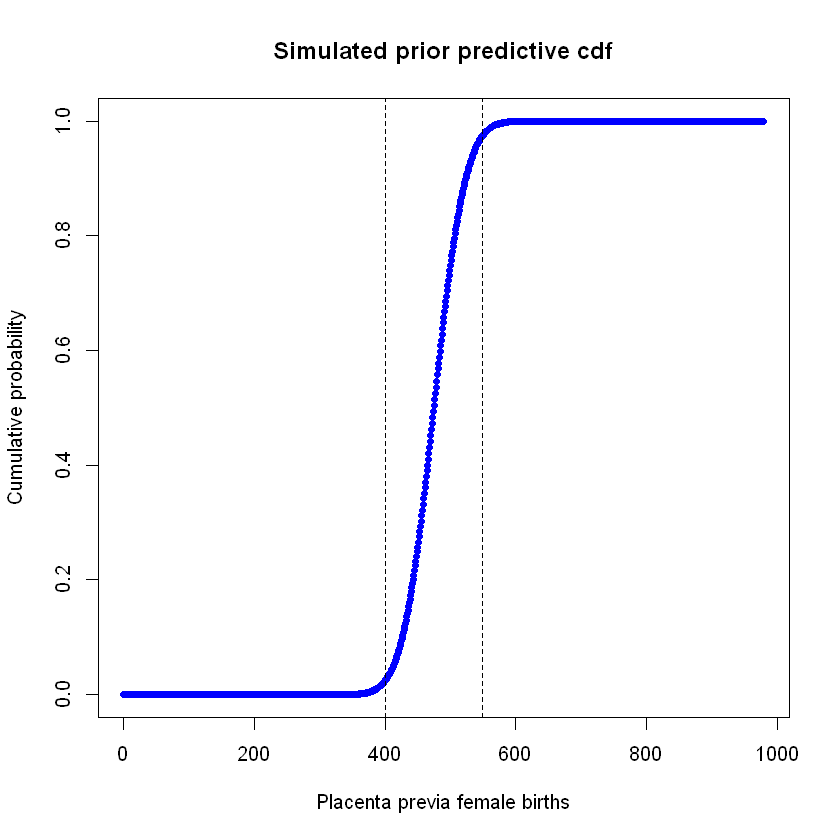

In [20]:
# 95% CI
for (i in 1:length(a.prior)){
    indexLowerCI <- which.min(abs(p[,i] - 0.025))
    indexUpperCI <- which.min(abs(p[,i] - 0.975))
    lower.bounds[i] <- X[indexLowerCI-1]
    upper.bounds[i] <- X[indexUpperCI-1]

    # Median
    indexMedian <- which.min(abs(p[,i] - 0.5))
    medians[i] <- X[indexMedian-1]

    # Plot CDFs with 95% CI
    plot(c(0,X),p[,i],type="p",pch=19,cex=0.8,col="blue",main="Simulated prior predictive cdf",xlab='Placenta previa female births',ylab="Cumulative probability")
    abline(v=lower.bounds[i],lwd = 1, col = 'black', lty='dashed')
    abline(v=upper.bounds[i],lwd = 1, col = 'black', lty='dashed')
}

In [22]:
df <- data.frame(
  a.prior,
  b.prior,
  lower.bounds,
  upper.bounds,
  medians,
  mode_values, # MAP
  mean_values # expectation
)

# Format numeric columns to display only x decimals
df[, 1:7] <- lapply(df[, 1:7], function(x) format(round(x, 0), nsmall = 0))
                    
# Display data frame as a table
print(df)

  a.prior b.prior lower.bounds upper.bounds medians mode_values mean_values
1       1       1           24          955     488         523         489
2       1       1           20          952     469           2         474
3       2       3          110          850     472         484         474
4       5       5          194          761     473         456         475
5      10      10          266          686     474         458         475
6      48      52          375          575     474         480         475
7      97     103          401          549     475         475         475


### Defining Simulated Posterior predictive pmf

Here we simulated according to what we explained in the theoretical introduction

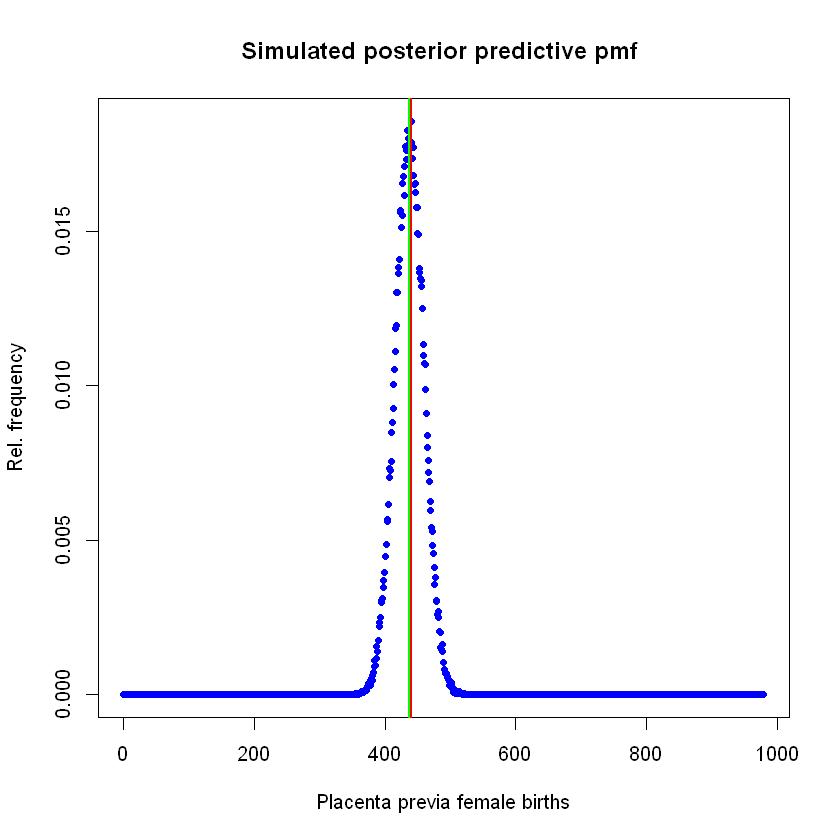

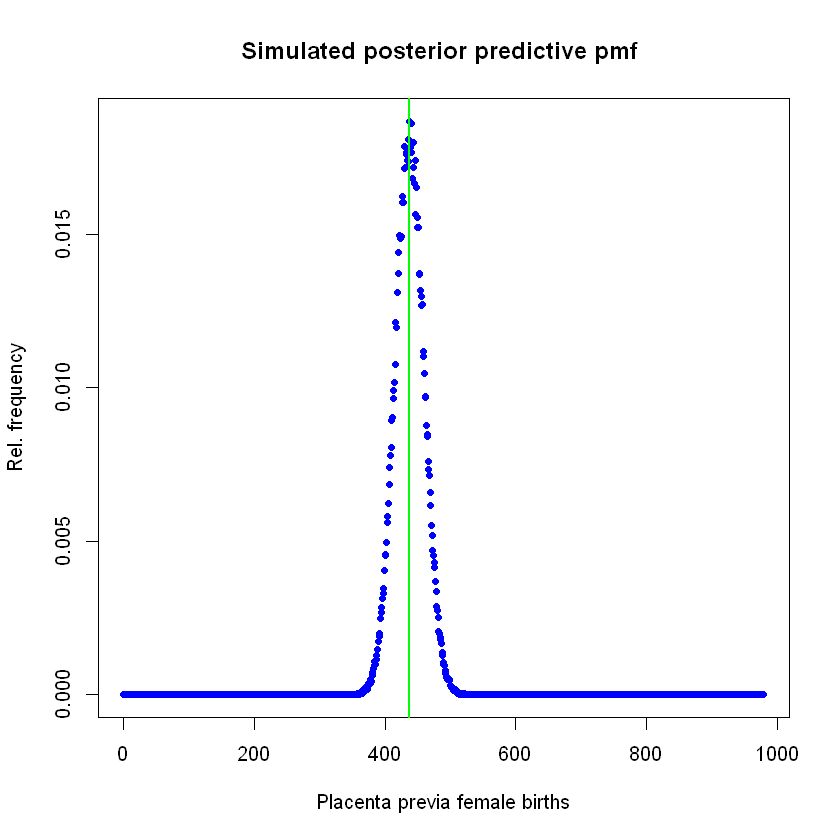

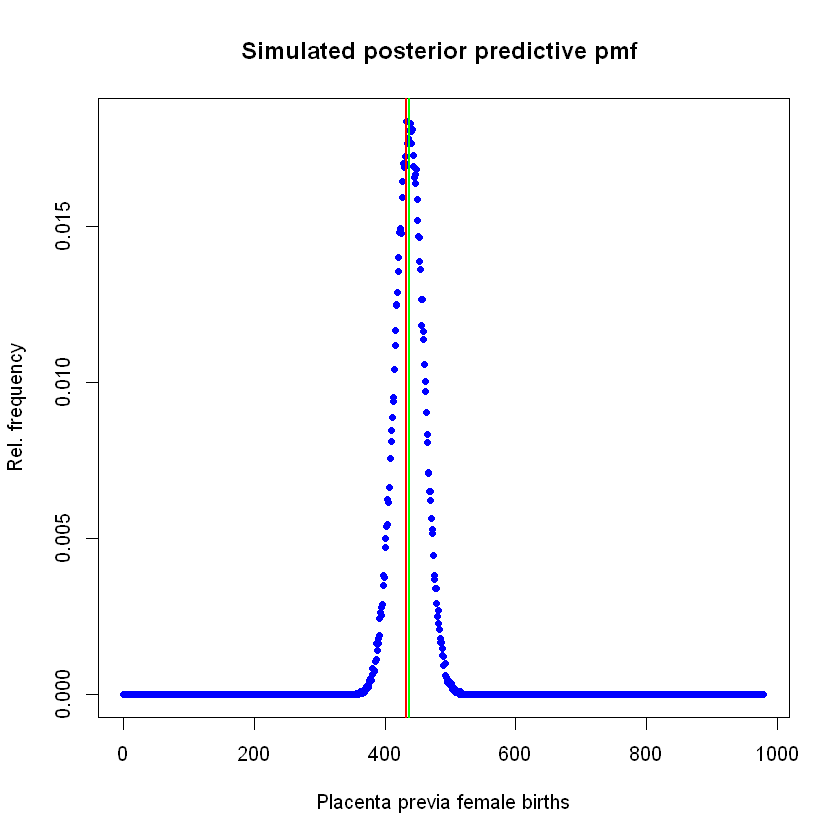

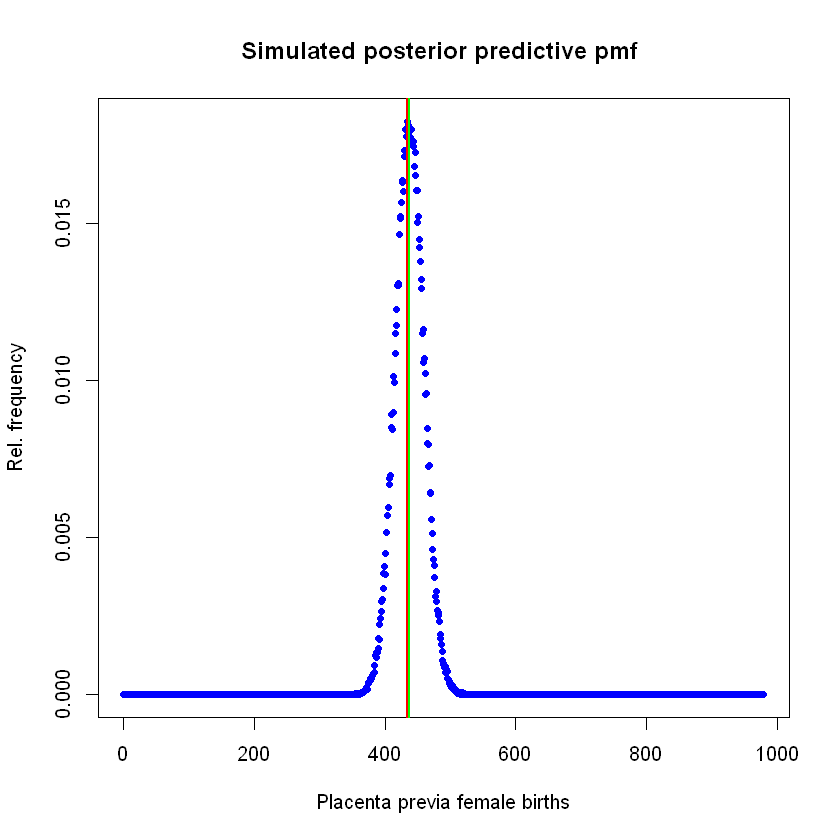

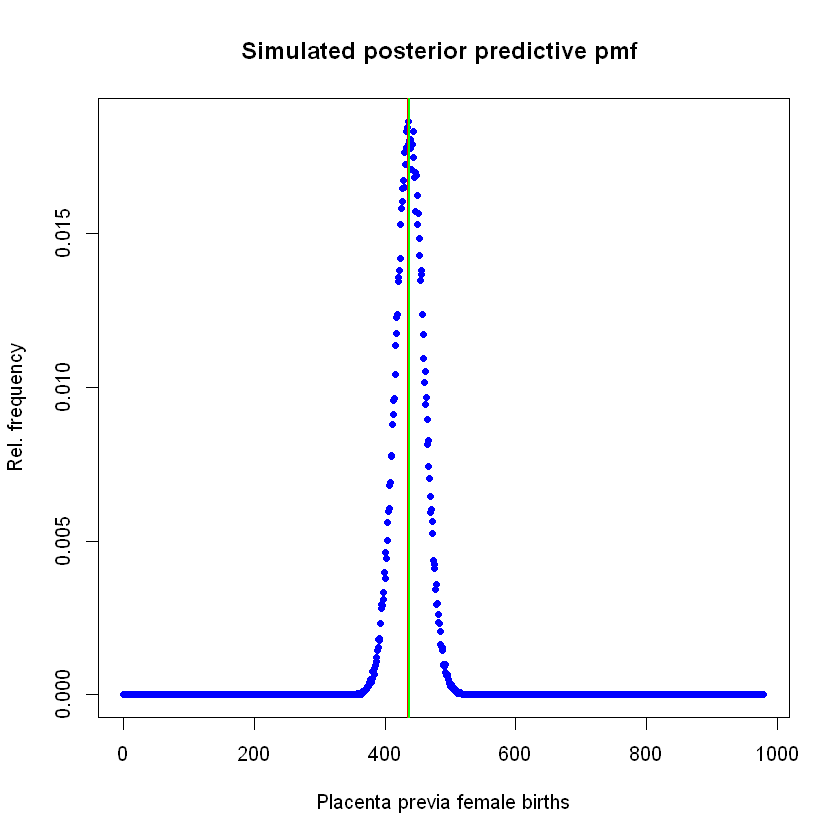

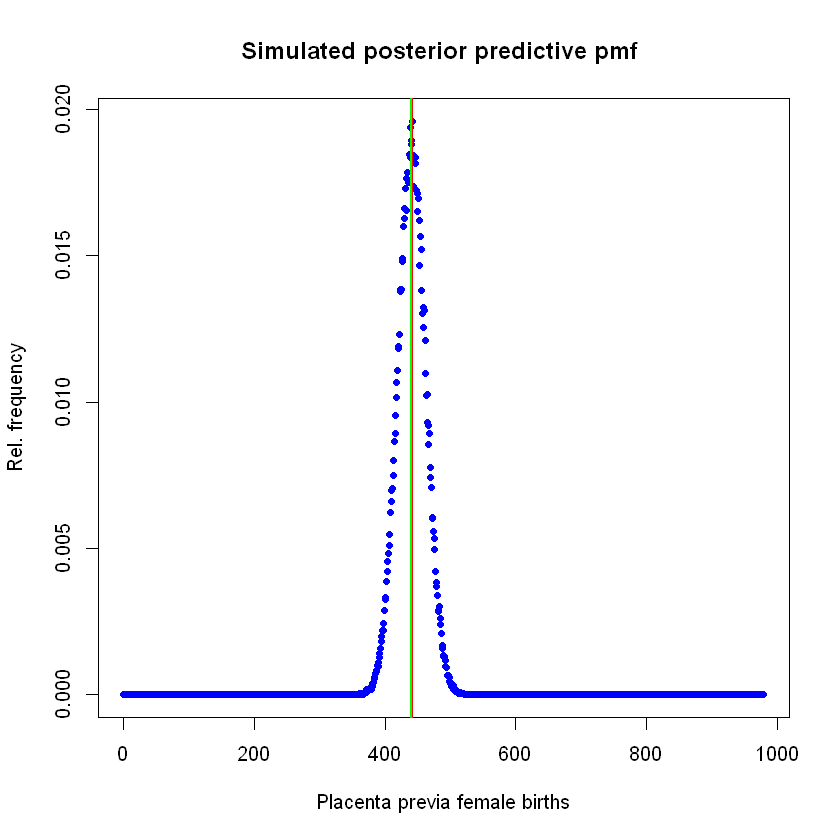

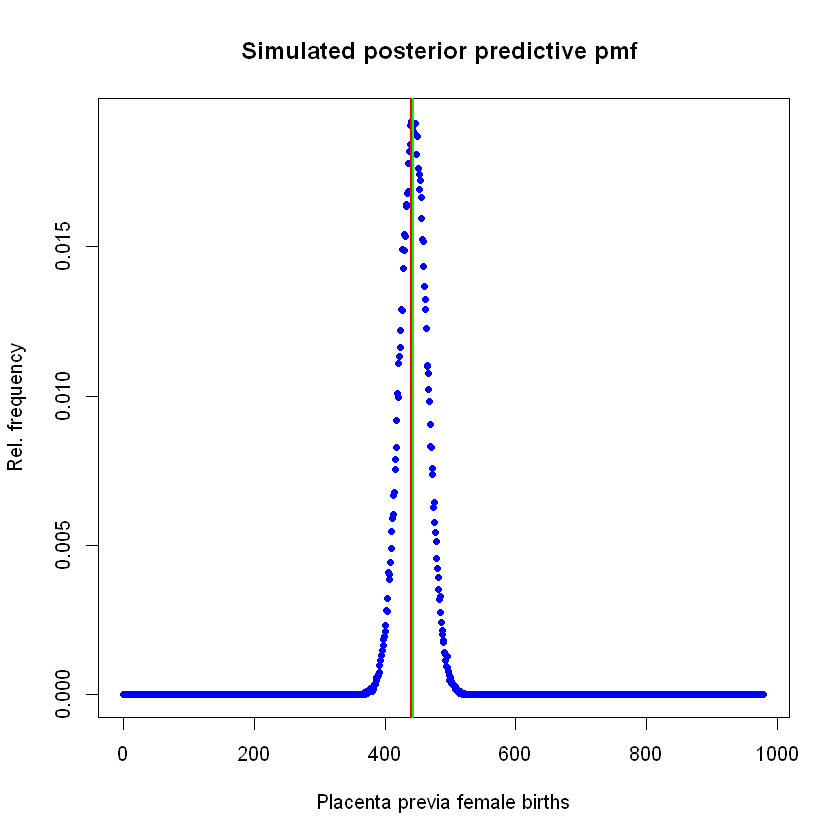

In [26]:
n <- 100000
thetas <- matrix(0, nrow = n, ncol = length(a.post))
x <- matrix(0, nrow = n, ncol = length(a.post))

for (i in 1:length(a.post)){
    thetas[,i] <- rbeta(n, a.post[i], b.post[i])  # here we are using a+437 and b+980-437
    x[,i] <- rbinom(n,980,thetas[,i]) # Because the likelihood is a binomial function.
}

# Empirical pmf
f <- matrix(0, nrow = length(0:980), ncol = length(a.post))
mode_value <- numeric(length(a.post))
mean_value <- numeric(length(a.post))

for (j in 1:length(a.post)){
    X <- 0:980
    F<-rep(0,length(X))
    
    for (i in X){
        F[i]<-sum(x[,j]==X[i])
        }
    f[,j]<-F/n

    plot(X,f[,j],type="p",pch=19,cex=0.8,col="blue",
         main=paste("Simulated posterior predictive pmf", names(a.post)[j]), 
         xlab='Placenta previa female births', ylab="Rel. frequency")

    mode_values[j] <- Mode(x[,j])
    abline(v=mode_values[j],lwd = 2, col = 'red') # Mode

    mean_values[j] <- mean(x[,j])
    abline(v=mean_values[j],lwd = 2, col = 'green') # Mean
}


In [24]:
#Calculating cdf
p <- matrix(0, nrow = length(0:981), ncol = length(a.post))

for (i in 1:length(a.post)){
    p[,i]<-c(0,cumsum(f[,i])) # cdf
}

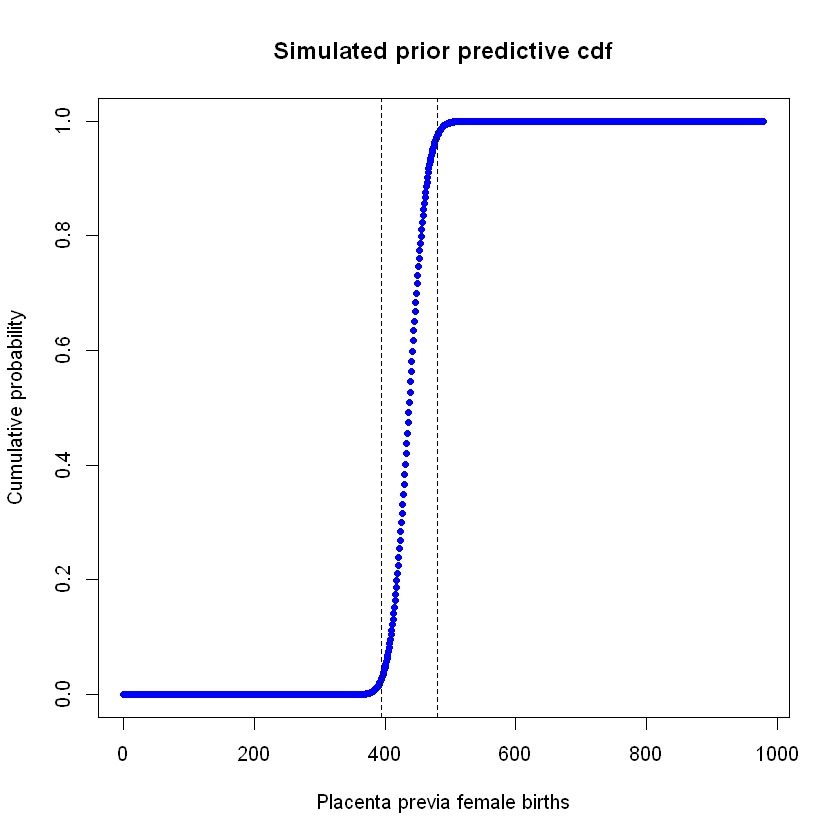

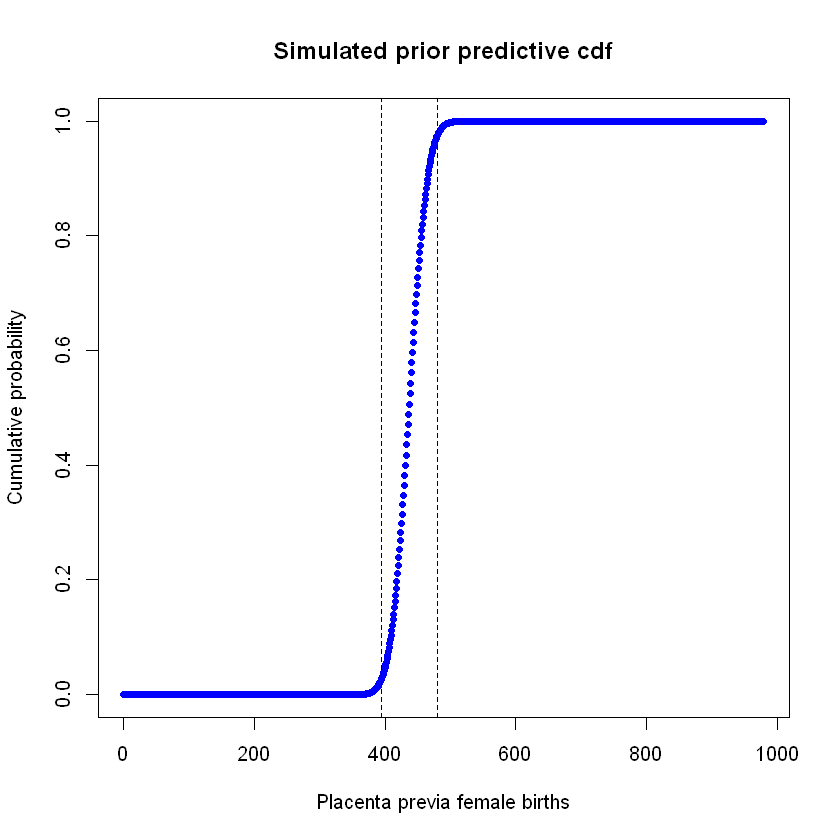

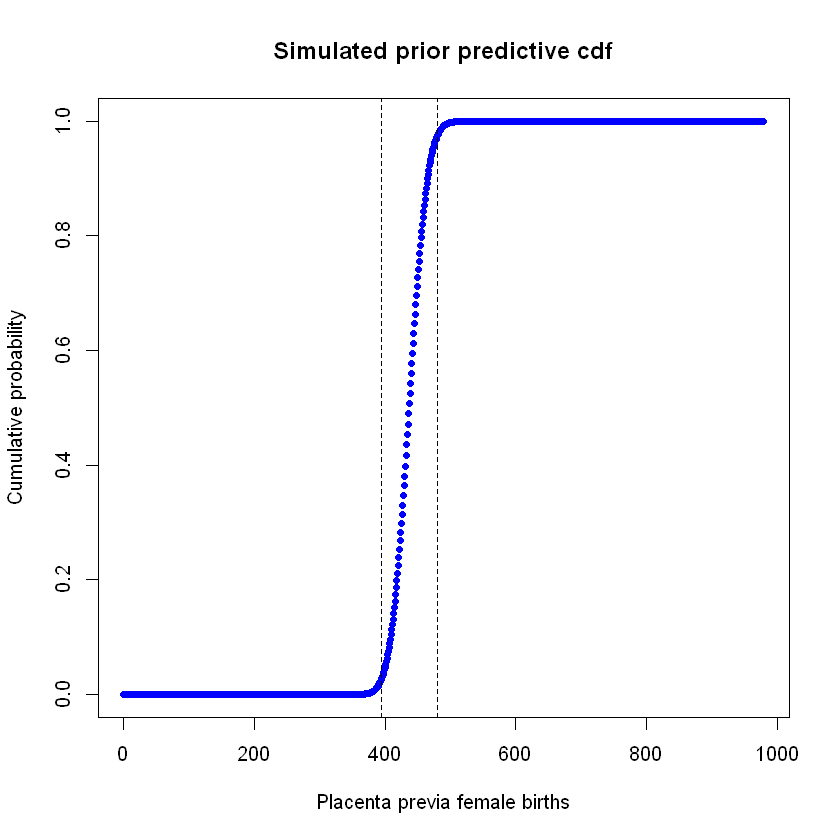

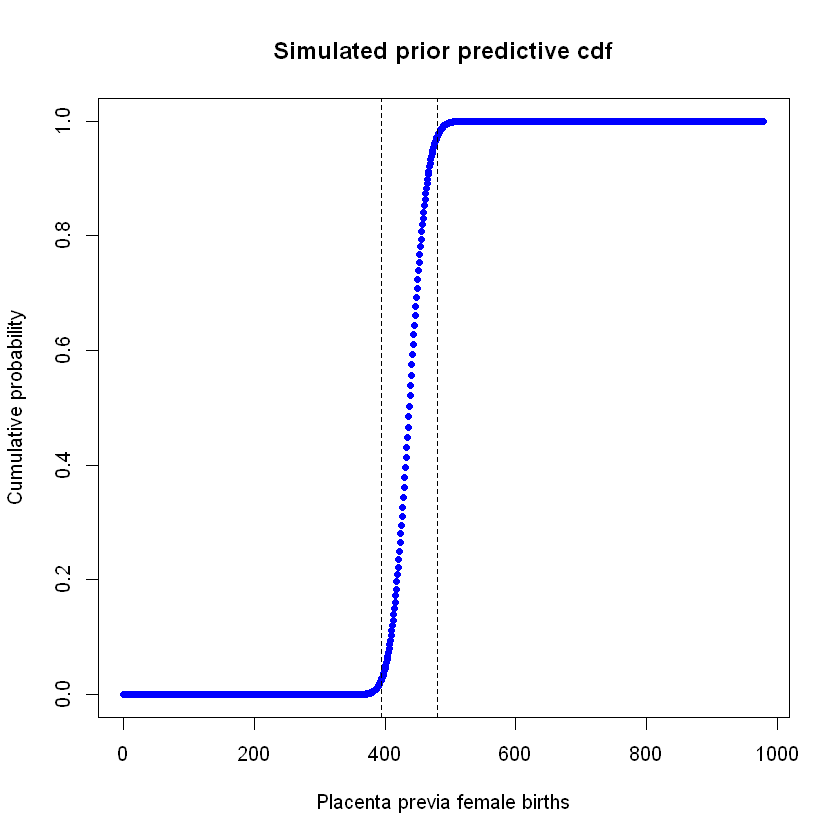

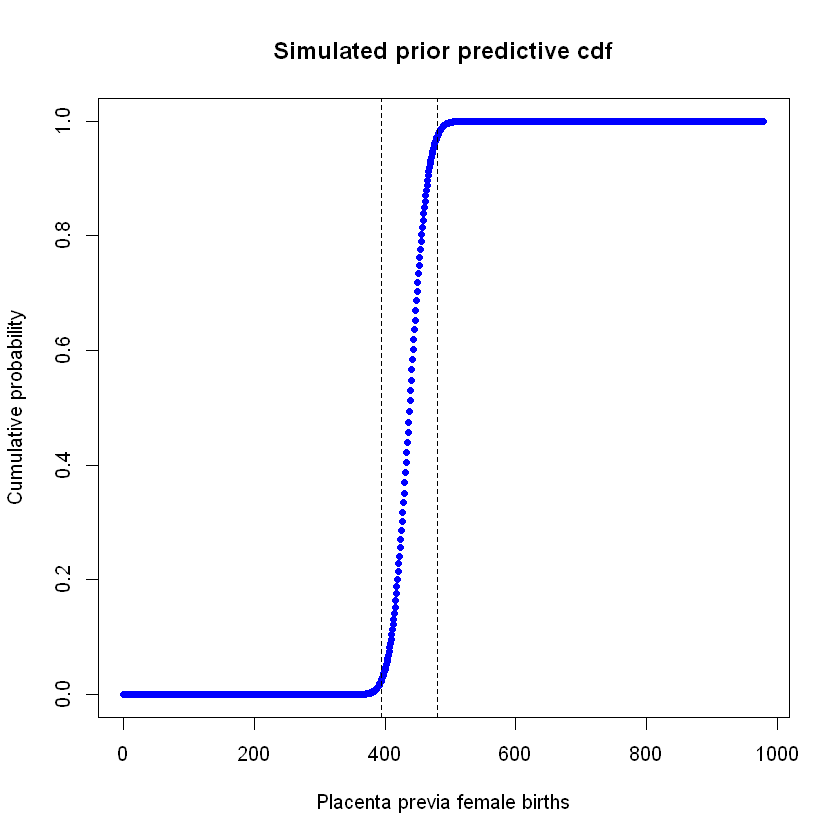

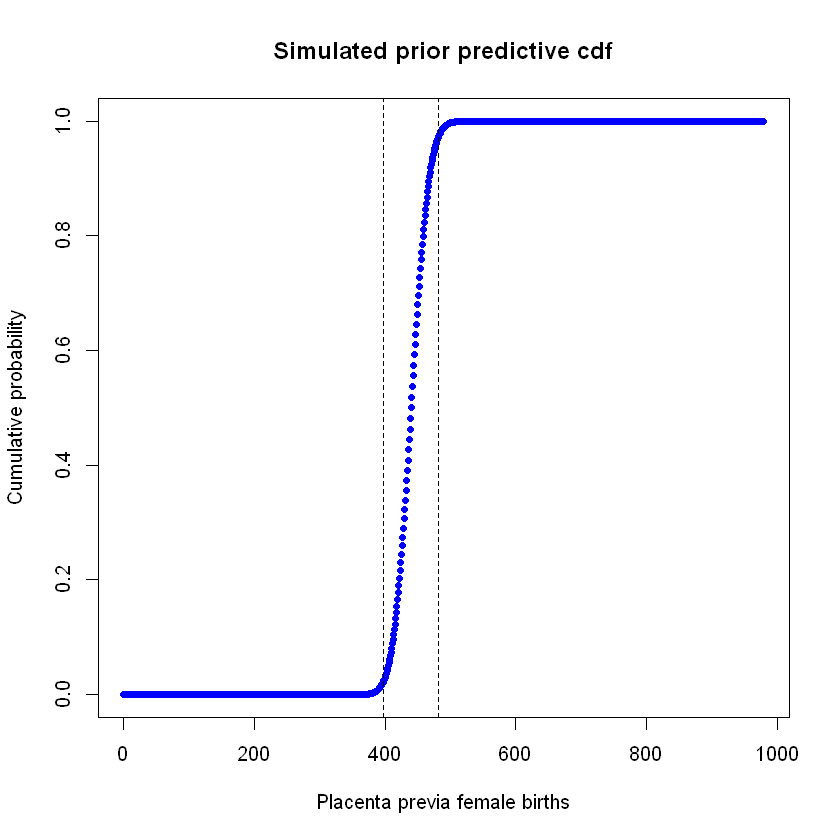

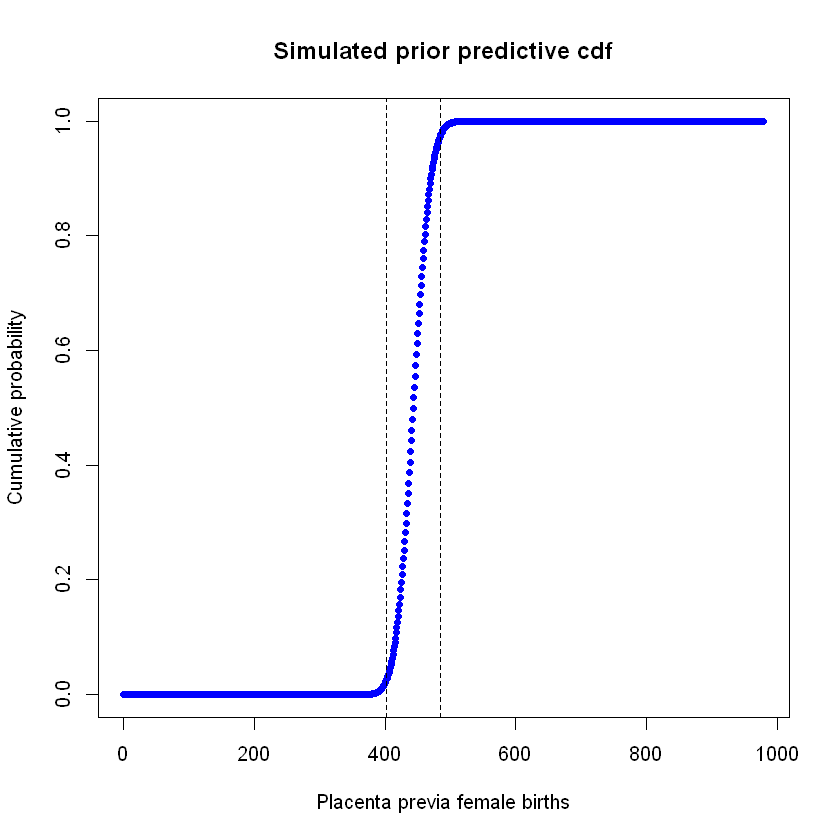

In [25]:
# 95% CI
for (i in 1:length(a.prior)){
    indexLowerCI <- which.min(abs(p[,i] - 0.025))
    indexUpperCI <- which.min(abs(p[,i] - 0.975))
    lower.bounds[i] <- X[indexLowerCI-1]
    upper.bounds[i] <- X[indexUpperCI-1]

    # Median
    indexMedian <- which.min(abs(p[,i] - 0.5))
    medians[i] <- X[indexMedian-1]

    # Plot CDFs with 95% CI
    plot(c(0,X),p[,i],type="p",pch=19,cex=0.8,col="blue",main="Simulated prior predictive cdf",xlab='Placenta previa female births',ylab="Cumulative probability")
    abline(v=lower.bounds[i],lwd = 1, col = 'black', lty='dashed')
    abline(v=upper.bounds[i],lwd = 1, col = 'black', lty='dashed')
}

In [27]:
df <- data.frame(
  a.post,
  b.post,
  lower.bounds, # Lowe and upper gives 95%
  upper.bounds,
  medians,
  mode_values, # MAP
  mean_values # EXPECTATION 
)

# Format numeric columns to display only x decimals
df[, 1:7] <- lapply(df[, 1:7], function(x) format(round(x, 0), nsmall = 0))
                    
# Display data frame as a table
print(df)

  a.post b.post lower.bounds upper.bounds medians mode_values mean_values
1    438    544          394          480     436         441         437
2    438    544          394          480     437         437         437
3    439    546          394          480     437         433         437
4    442    548          394          480     437         434         437
5    447    553          395          480     437         436         438
6    486    594          398          482     440         442         441
7    534    646          402          484     443         440         444


Now we proceed reproducing the figure 2.3 in BDA 3 with the posterior distribution of $\theta$, the logit transformation defined as 
$$
log\Bigl(\frac{\theta}{1-\theta}\Bigr)
$$
and the sex ratio $\displaystyle \frac{1-\theta}{\theta}$

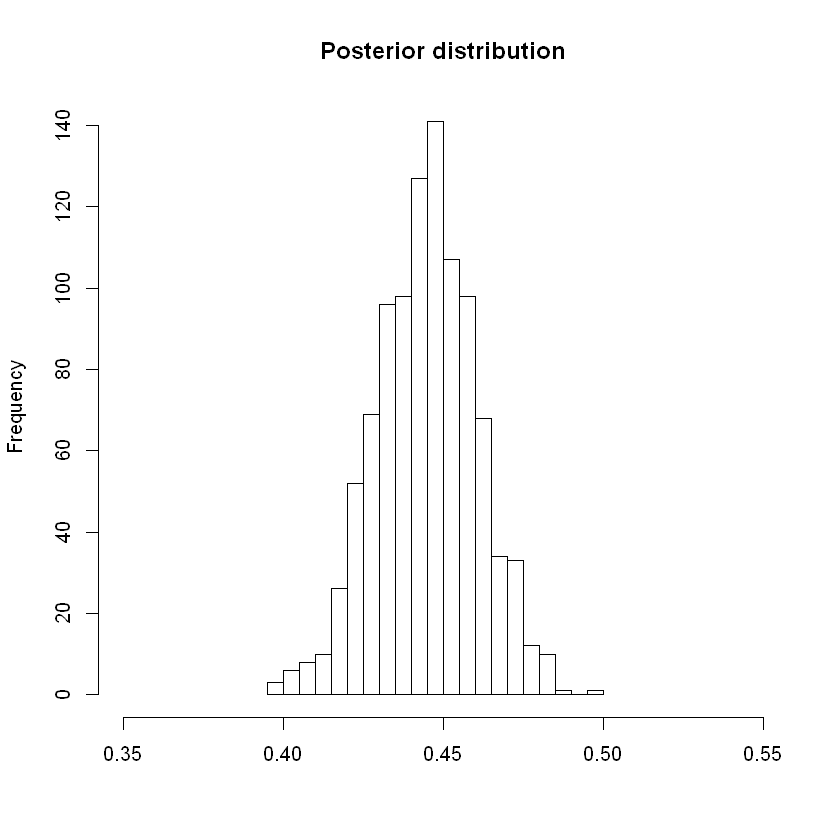

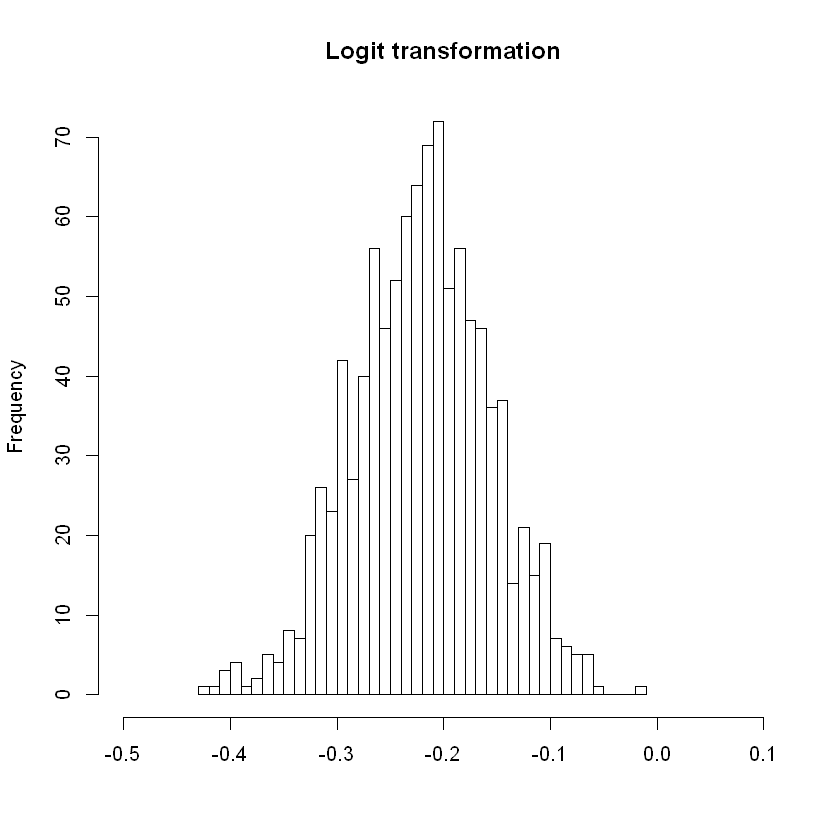

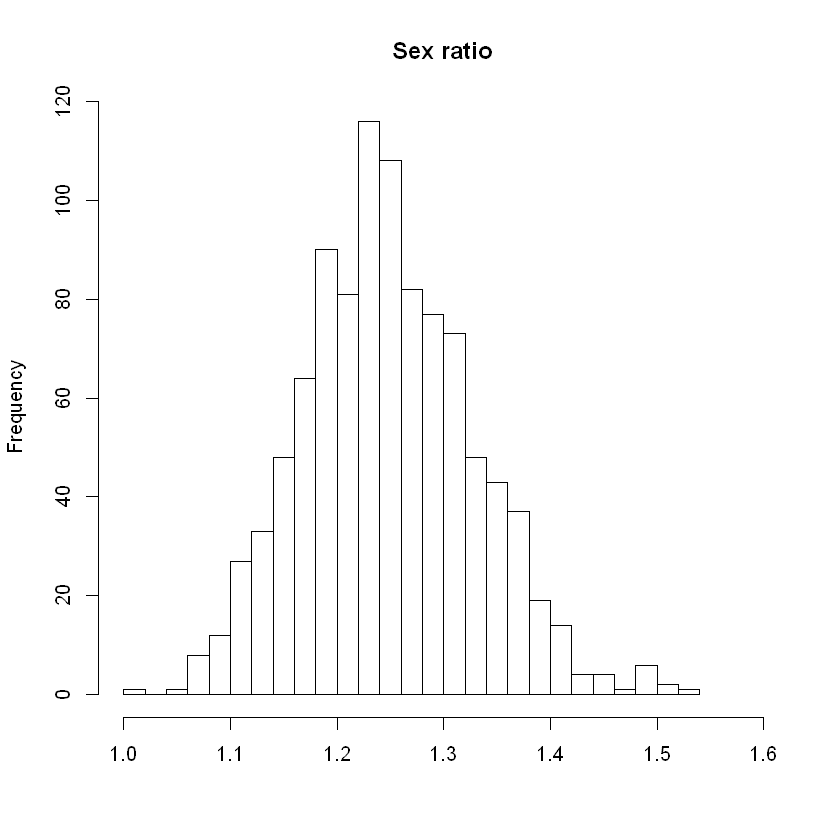

In [ ]:
# USUAL SIMULATION

param <- beta_param(0.5,2)
beta_sample <- rbeta(sample_size, param[1]+437, param[2]+980-437)
hist(round(beta_sample,3), main="Posterior distribution",xlim=c(0.35,0.55), xlab = "", breaks = 30)
logit=log(beta_sample/(1-beta_sample))
hist(round(logit,3), main="Logit transformation",xlim=c(-0.5,0.1), xlab = "", breaks = 30)
sex_ratio=(1-beta_sample)/beta_sample
hist(round(sex_ratio,3), main="Sex ratio",xlim=c(1,1.6), xlab = "", breaks = 30)





# Nonconjugate prior distribution

To conclude, we compare these results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$ for those $\alpha_0,\beta_0$ with expectation and variance equal to the piecewise linear function $h(t)$. We recall that, for a beta distribution, the expectation is
$$
    \operatorname{E}(X)=\mu=\frac{\alpha}{\alpha+\beta},
$$
and the variance is
$$
    \operatorname{var}(X)=\sigma^2=\frac{\alpha\,\beta}{(\alpha+\beta)^{2}\,(\alpha+\beta+1)}.
$$
From that, the two parameters can be expressed as
$$
\begin{array}{lcl}
    \alpha  &=&\mu\cdot\left[\dfrac{\mu\,(1-\mu)}{\sigma^{2}}-1\right],\\[0.4cm]
    \beta   &=&(1-\mu)\cdot\left[\dfrac{\mu\,(1-\mu)}{\sigma^{2}}-1\right].
\end{array}
$$

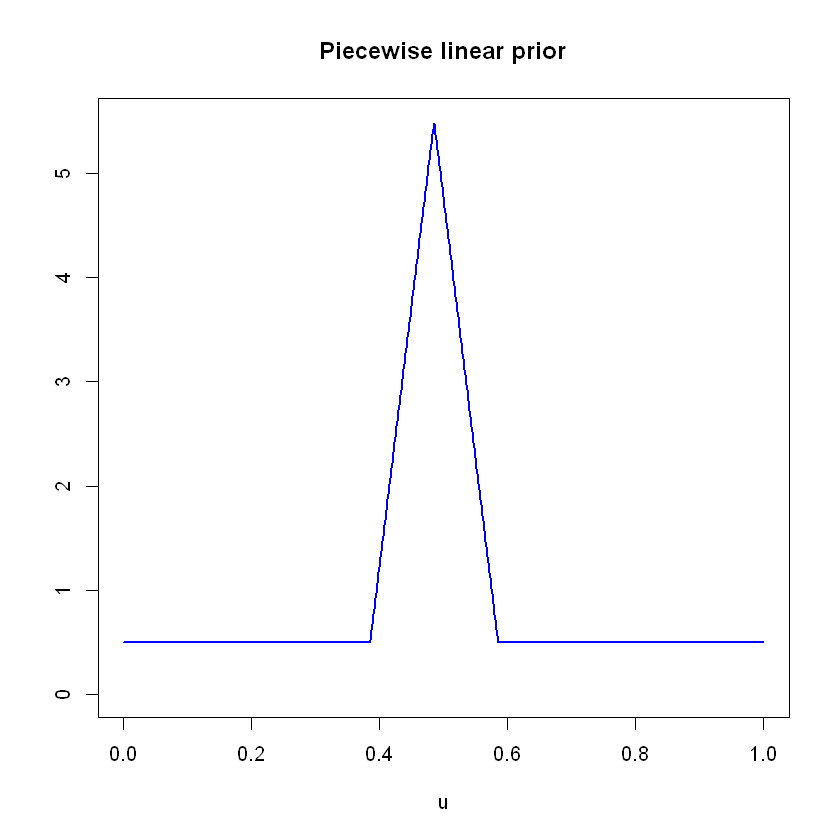

In [1]:
# h(t)
m<-0.485
c<-0.100
p.tails<-0.4  
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}
u<-seq(0,1,length=1000)
plot(u,h(u),"l",lwd=2,col="blue",xlim=c(0,1),ylim=c(0,5.5),ylab="",main="Piecewise linear prior")

In [2]:
# Let us compute the mean of h(t) and variance of h(t)
mean_value <- function(h) {
  result <- integrate(function(t) h(t) * t, lower = 0, upper = 1)$value
  return(result)
}
mu <- mean_value(h)
print(paste("The mean value of h(t) is:", round(mu,3)))

std_deviation <- function(h,mean_value) {
  result <- integrate(function(t) h(t) * (t-mu)^2, lower = 0, upper = 1)$value
  return(sqrt(result))
}
s <- std_deviation(h, mean_value_h)

print(paste("The standard deviation of h(t) is:", round(s,3)))

# Having these two value, we can solve and obtain the value of a,b such that we have this standard deviation and expectation.
alpha_0<- mu*(mu*(1-mu)/s^2-1)
beta_0<-(1-mu)*(mu*(1-mu)/s^2-1)

[1] "The mean value of h(t) is: 0.492"
[1] "The standard deviation of h(t) is: 0.206"


We retreived the values for $\alpha_0$ and $\beta_0$ and now we plot our prior distribution

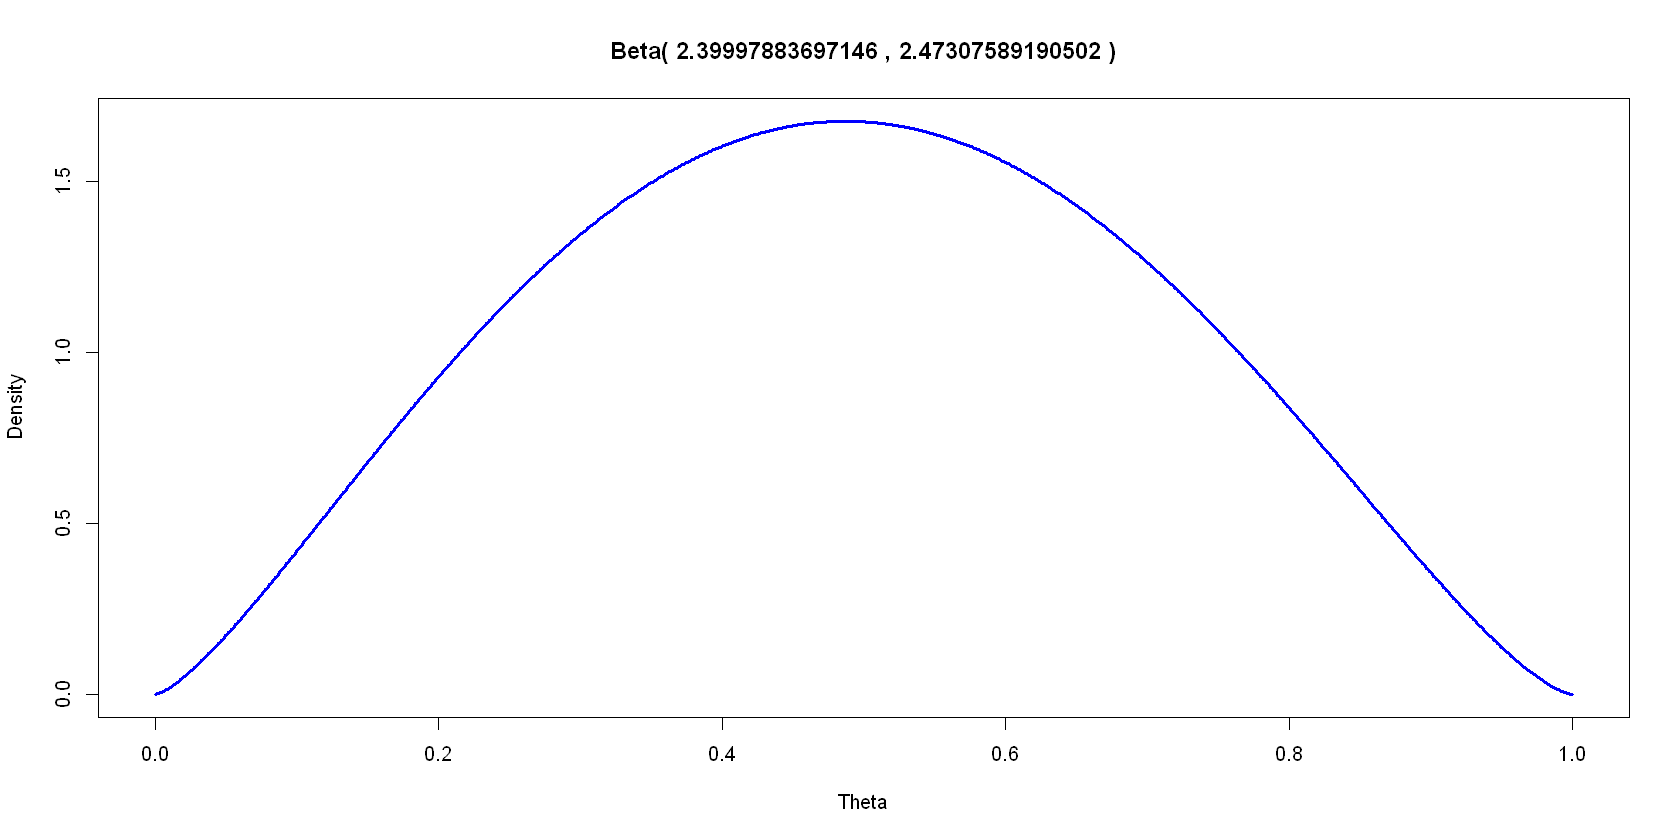

In [22]:
#Plot beta prior (alpha_0, beta_0)
options(repr.plot.width=14,repr.plot.height=7)
xs <- seq(0,1,by=0.001)
plot(xs, dbeta(xs, alpha_0, beta_0), type = 'l', lwd = 3,
       ylab = "Density", xlab = "Theta",
       main = paste("Beta(", alpha_0, ",", beta_0, ")"),
       col = "blue")

#### Comparing the posterior quantities with both priors. 

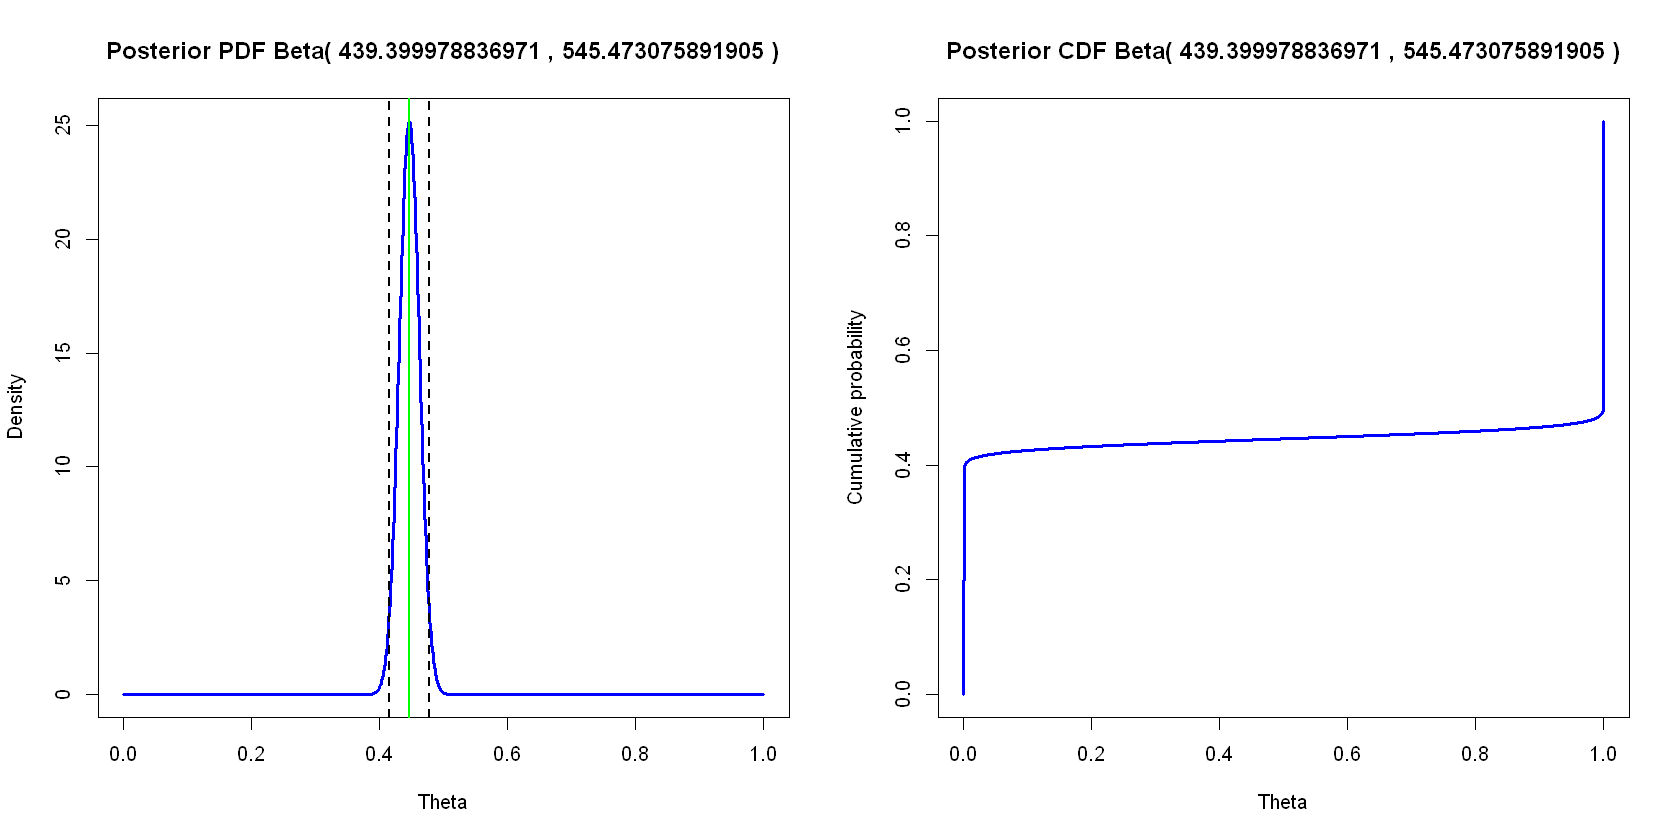

In [33]:
options(repr.plot.width=14,repr.plot.height=7)
# Posterior distribution - beta(alpha_0 + x, beta_0 + n - x)
a.post <- alpha_0 + 437
b.post <- beta_0 + 980 - 437

#Plot PDF
old.par<-par(mfrow=c(1,2))
plot(xs, dbeta(xs, a.post, b.post), type = 'l', lwd = 3,
       ylab = "Density", xlab = "Theta",
       main = paste("Posterior PDF Beta(", a.post, ",", b.post, ")"),
       col = "blue")
  
# Calculate MAP (Mode)
mode_values <- (a.post - 1) / (a.post + b.post - 2)
abline(v=mode_values, lwd = 2, col = 'red') 
    
# Calculate Posterior expectation estimator (Mean)
mean_values <- a.post/(a.post + b.post)
abline(v=mean_values, lwd = 2, col = 'green')

# 95% CI
lower.bounds <- qbeta(0.025,a.post, b.post)
abline(v=lower.bounds, lwd = 2, col = 'black', lty='dashed')

upper.bounds <- qbeta(0.975,a.post, b.post)
abline(v=upper.bounds, lwd = 2, col = 'black', lty='dashed')

medians <- qbeta(0.5,a.post, b.post)

#Plot CDF
plot(xs, qbeta(xs, a.post, b.post), type = 'l', lwd = 3,
       ylab = "Cumulative probability", xlab = "Theta",
       main = paste("Posterior CDF Beta(", a.post, ",", b.post, ")"),
       col = "blue")

In [35]:
df <- data.frame(
  a.post,
  b.post,
  lower.bounds,
  upper.bounds,
  medians, 
  mode_values, # This is the MAP
  mean_values # This is the posterior expectation
)
print(df)

  a.post   b.post lower.bounds upper.bounds   medians mode_values mean_values
1  439.4 545.4731    0.4152298    0.4772751 0.4461124   0.4460393   0.4461488


### Posterior distribution with piecewise linear nonconjugate prior.

In [2]:
# Non conjugate prior
# here we define h(t)
m<-0.485
c<-0.100
p.tails<-0.4  
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

In [3]:
n<-980
x<-437
N<-1000 # number of grid intervals
t<-seq(0,1,length=N)
t<-t[-N]# remove last point (equal to 1: we want N intervals)

In [4]:
# Likelihood
Lik<-function(x,theta,n){theta^x*(1-theta)^(n-x)}
LogLik<-function(x,theta,n){x*log(theta)+(n-x)*log(1-theta)}
log.nnpost<-LogLik(x,t,n)+log(h(t))
nnpost<-exp(log.nnpost)

In [5]:
dpost<-nnpost/sum(nnpost) # pmf
ppost<-c(0,cumsum(dpost)) # cdf

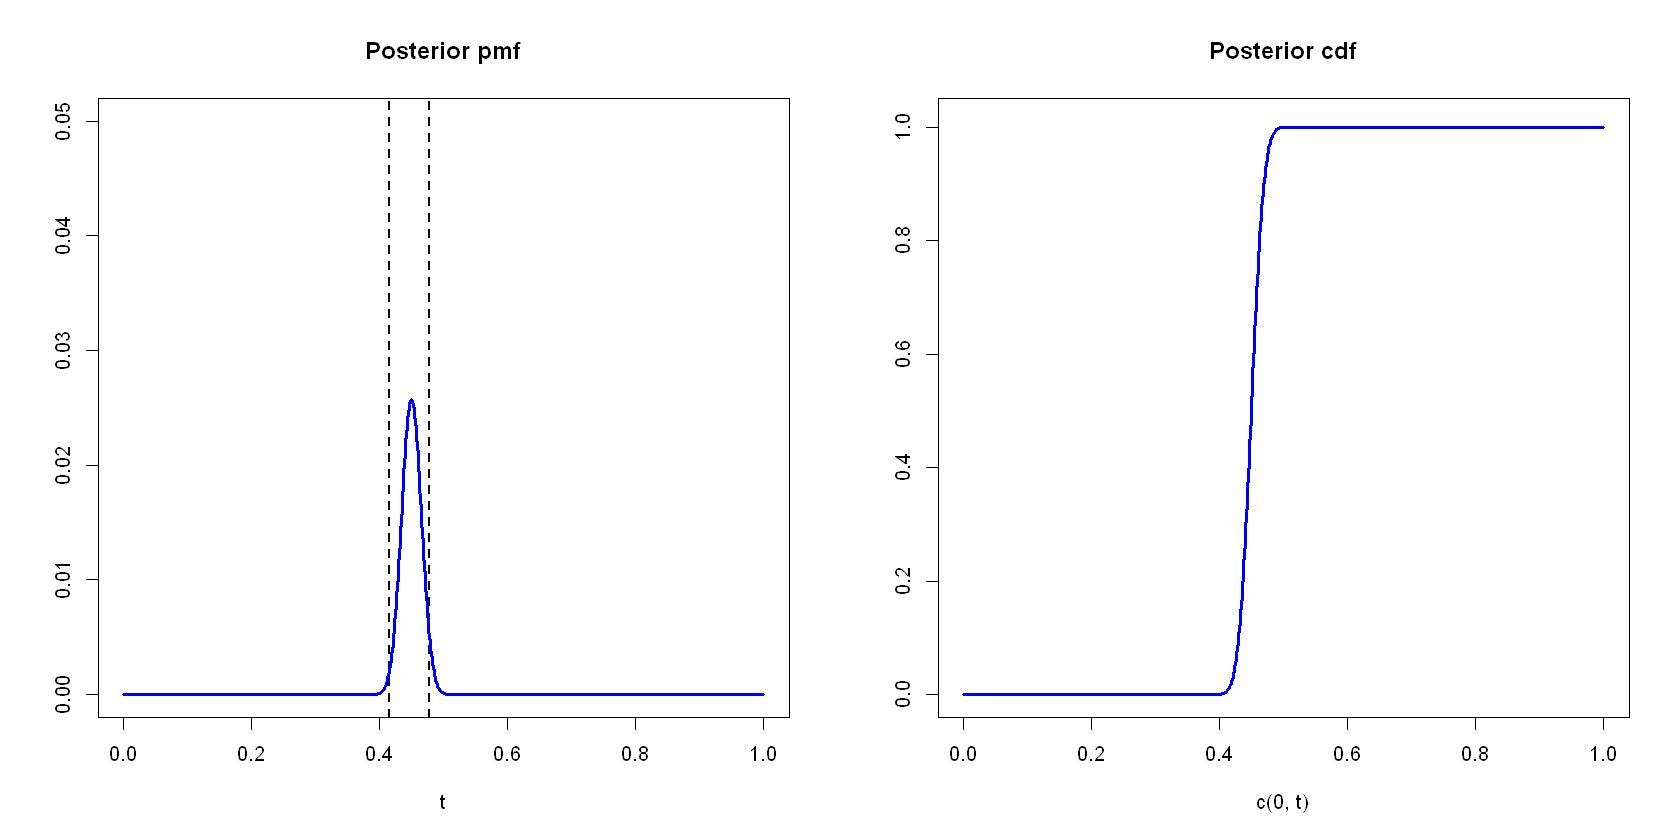

In [40]:
options(repr.plot.width=14,repr.plot.height=7)
old.par<-par(mfrow=c(1,2))
# pmf
plot(t,dpost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,0.05),ylab="",main="Posterior pmf")
#abline(h=0,lwd=2,col="black")
#abline(v=m,lwd=2,col="green")
#abline(h=a+b,lwd=2,col="green")
abline(v=lower.bounds, lwd=2, col='black', lty='dashed')
abline(v=upper.bounds, lwd=2, col='black', lty='dashed')
lines(t,dpost,lwd=2.5,col="blue")
#text(-0.01,a+b-0.15,"a+b")
#text(-0.01,a+0.15,"a")
#text(m,-0.15,"m")
#text(m-c-0.01,-0.15,"m-c")
#text(m+c-0.01,-0.15,"m+c")
# cdf
plot(c(0,t),ppost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,1.01),ylab="",main="Posterior cdf")
#abline(h=0,lwd=2,col="black")
#abline(v=m,lwd=2,col="green")
#abline(h=a+b,lwd=2,col="green")
lines(c(0,t),ppost,lwd=2.5,col="blue")
#text(-0.01,a+b-0.15,"a+b")
#text(-0.01,a+0.15,"a")
#text(m,-0.15,"m")
#text(m-c-0.01,-0.15,"m-c")
#text(m+c-0.01,-0.15,"m+c")
par(old.par)

In [41]:
# Mean, Mode, Median
indexMedian<- which.min(abs(ppost - 0.5))
medians <- t[indexMedian-1]

indexMode <- which.max(dpost)
mode_values <- t[indexMode-1]

mean_values <- sum(t * dpost)

In [43]:
df <- data.frame(
  lower.bounds,
  upper.bounds,
  medians,
  mode_values, 
  mean_values
)
                    
print(df) # HERE WE HAVE THE 95%, THE MEDIAN THE MAP AND THE POSTERIO EXPECTATION

  lower.bounds upper.bounds   medians mode_values mean_values
1    0.4152298    0.4772751 0.4494494   0.4484484   0.4495194


### Exercise 1.2

To simulate the prior predictive pmf with this piecewise linear prior for theta, we will firstly sample from the distribution by the inverse transformation method. To do so, firstly we use a uniform r.v. $U$ defined in $[0,1]$, then consider the composition $$F^{-} \circ U $$
where $F^{-}$ is the quantile inverse function. To do so, now we firstly integrate the $h(t)$ resulting in the cdf $F$ and then inverting the function. We use a trick in r to do so. We can think of the inverse function as the function such that computes $t$, solution to $F(t)=c$, hence we use the uniroot function to obtain the value of $t$, which is $F^{-1}(c)$.

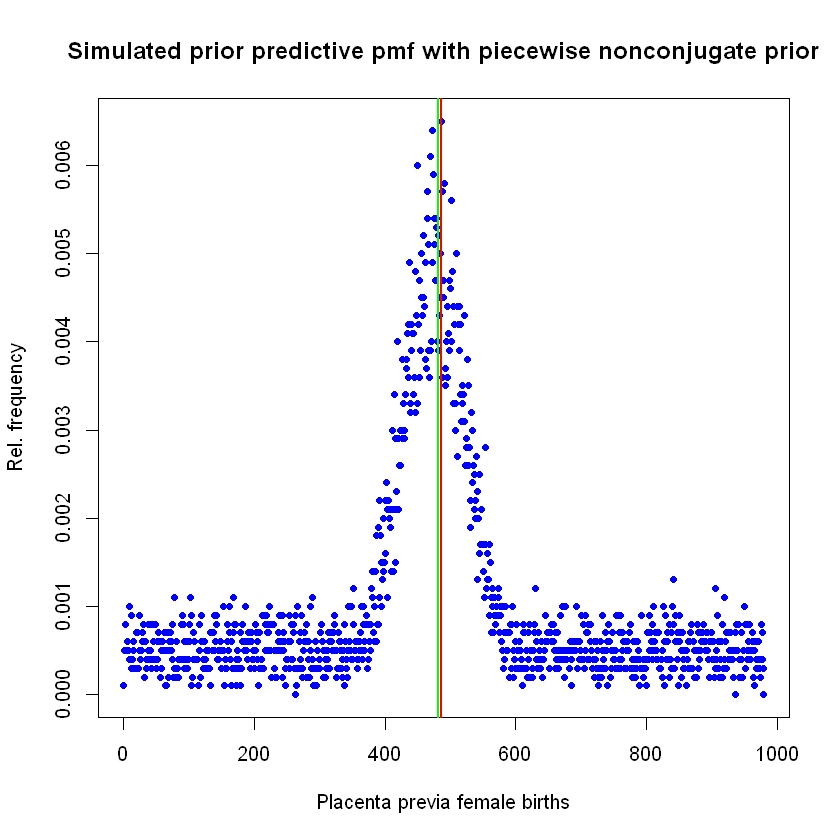

In [7]:
n<-10000
u <- runif(n= 10000, min=0, max=1)
H <- function(t) {
  integral <- integrate(h, lower = 0, upper = t)$value
  return(integral)
} # This is the cdf function, just the integral of the previous function

# Now we have to compute the inverse of the cdf 

H_inv <- function(u) {
  uniroot(function(t) H(t) - u, interval = c(0, 1))$root # in this case we are obtaining just the 
}

h_sampled <- sapply(u, H_inv) # following the theory now we compose F^{-1} with U
x <- rbinom(n,980,h_sampled)
X <- 0:980
F<-rep(0,length(X))

for (i in X){
    F[i]<-sum(x==X[i])
    }
f<-F/n

plot(X, f, type="p", pch=19, cex=0.8, col="blue",
    main="Simulated prior predictive pmf with piecewise nonconjugate prior", 
    xlab='Placenta previa female births', ylab="Rel. frequency")

medians <- median(x)

mode_values <- Mode(x)
abline(v=mode_values,lwd = 2, col = 'red') # Mode

mean_values <- mean(x)
abline(v=mean_values,lwd = 2, col = 'green') # Mean

sdev <- sd(x)

In [9]:
print(paste("The mean is:", mean(x)))
print(paste("The mode is:", Mode(x)))
print(paste("The median is:", median(x)))
print(paste("The standard deviation is:", sd(x)))

[1] "The mean is: 481.5879"
[1] "The mode is: 486"
[1] "The median is: 476"
[1] "The standard deviation is: 202.304706799"


### B) Sample from its discretization

An alternative approach would be directly sampling from its discretization: we create a grid, normalize and then sample from that according to the values normalized which now represents the probabilities

In [15]:
n<-100000
t<-seq(0,1,length=1000)
t<-t[-1000]
h_values <- h(t)

# We normalize the values
h_normalized <- h_values / sum(h_values)

# As done before we compute the prior predictive pmf
thetas <- sample(t, size = 1000, replace = TRUE, prob = h_normalized)
x <- rbinom(n,980,thetas)

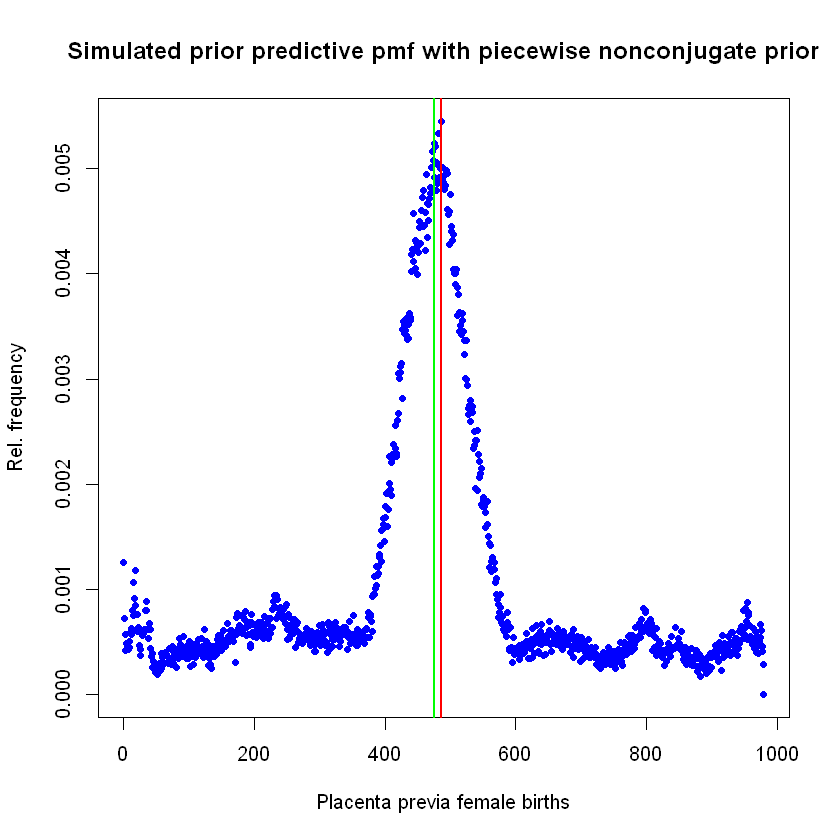

In [16]:
# Empirical pmf
X <- 0:980
F<-rep(0,length(X))

for (i in X){
    F[i]<-sum(x==X[i])
    }
f<-F/n

plot(X, f, type="p", pch=19, cex=0.8, col="blue",
    main="Simulated prior predictive pmf with piecewise nonconjugate prior", 
    xlab='Placenta previa female births', ylab="Rel. frequency")

medians <- median(x)

mode_values <- Mode(x)
abline(v=mode_values,lwd = 2, col = 'red') # Mode

mean_values <- mean(x)
abline(v=mean_values,lwd = 2, col = 'green') # Mean

sdev <- sd(x)

In [17]:
print(paste("The mean is:", mean(x)))
print(paste("The mode is:", Mode(x)))
print(paste("The median is:", median(x)))
print(paste("The standard deviation is:", sd(x)))

[1] "The mean is: 474.95116"
[1] "The mode is: 486"
[1] "The median is: 475"
[1] "The standard deviation is: 198.185934998684"


### C) Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$


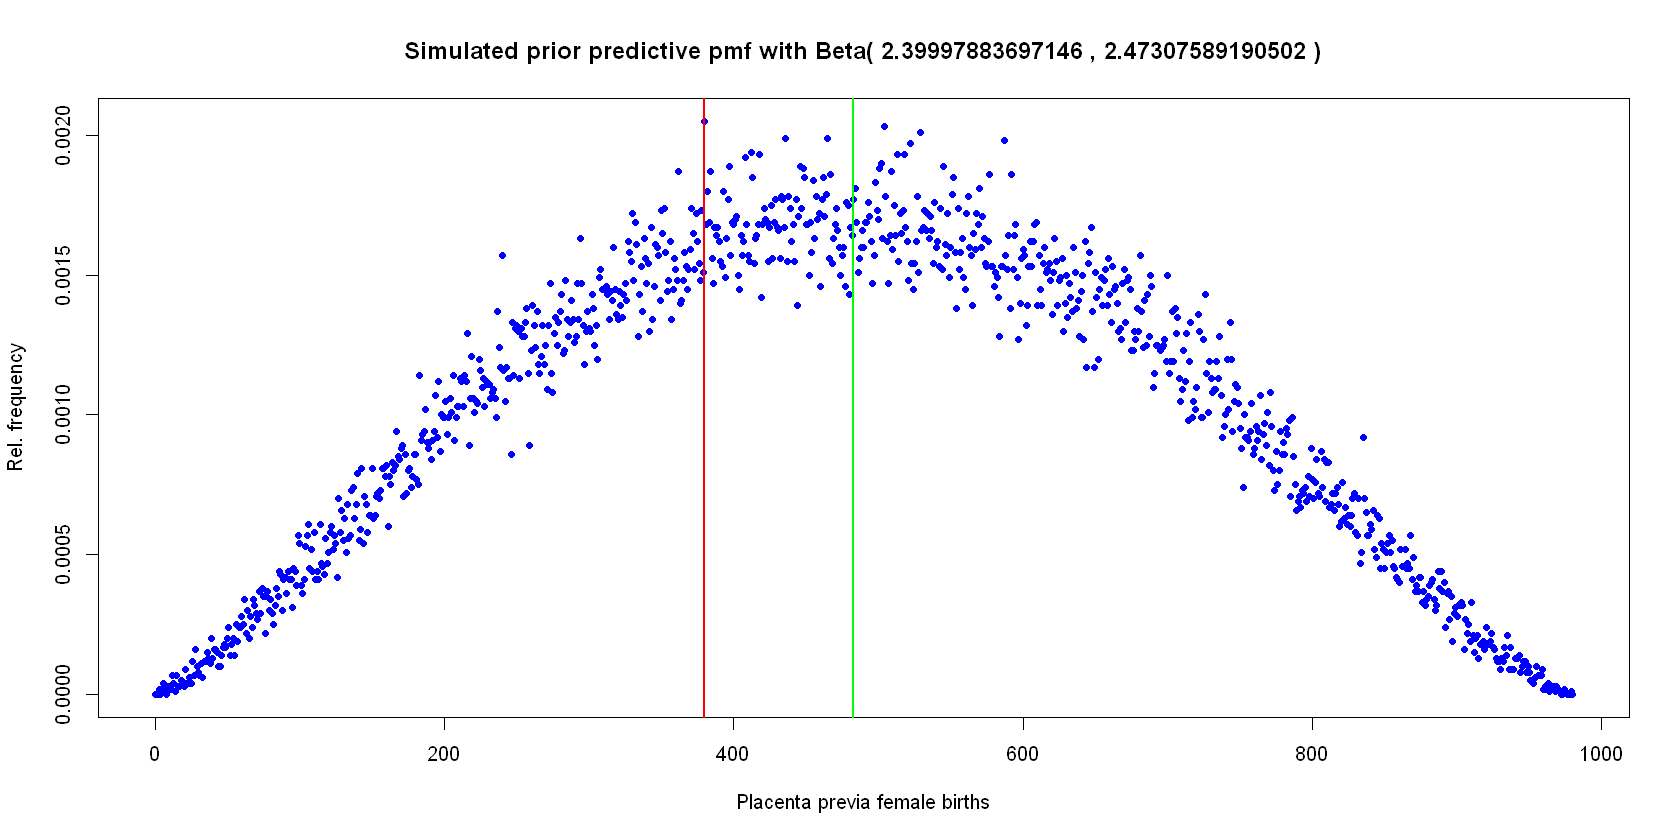

In [23]:
# We will produce the results, just to avoid useless repetition of code, to x_samples_prior: we compute the pmf, median, mode, expecation and standard deviation
n<-100000
thetas <- rbeta(n, alpha_0, beta_0)
x <- rbinom(n,980,thetas)

# Empirical pmf
X <- 0:980
F<-rep(0,length(X))

for (i in X){
    F[i]<-sum(x==X[i])
    }
f<-F/n

plot(X, f, type="p", pch=19, cex=0.8, col="blue",
     main = paste("Simulated prior predictive pmf with Beta(", alpha_0, ",", beta_0, ")"), 
    xlab='Placenta previa female births', ylab="Rel. frequency")

medians <- median(x)

mode_values <- Mode(x)
abline(v=mode_values,lwd = 2, col = 'red') # Mode

mean_values <- mean(x)
abline(v=mean_values,lwd = 2, col = 'green') # Mean

sdev <- sd(x)


In [24]:
print(paste("The mean is:", mean(x)))
print(paste("The mode is:", Mode(x)))
print(paste("The median is:", median(x)))
print(paste("The standard deviation is:", sd(x)))

[1] "The mean is: 482.4249"
[1] "The mode is: 380"
[1] "The median is: 481"
[1] "The standard deviation is: 202.882905526127"


The statistics are very similar to what we compute before even though the distribution is different because we are assuming different prior beliefs and the previous one, the piecewise function, imprints a more rigid behaviour on the population

### EX 1.3

The final part of the exercise asks to simulate the posterior predictive pmf (given the observed data of $437$ female births from $980$ placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf.

Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation and then compare the results with $Beta(\alpha_0,\beta_0)$

#### A) Sample from its discretization

In [11]:
n <- 10000
thetas <- sample(t, size = n, replace = TRUE, prob = dpost) #Where dpost was calculated in the section Posterior distribution with piecewise linear nonconjugate prior.
x <- rbinom(n,980,thetas)

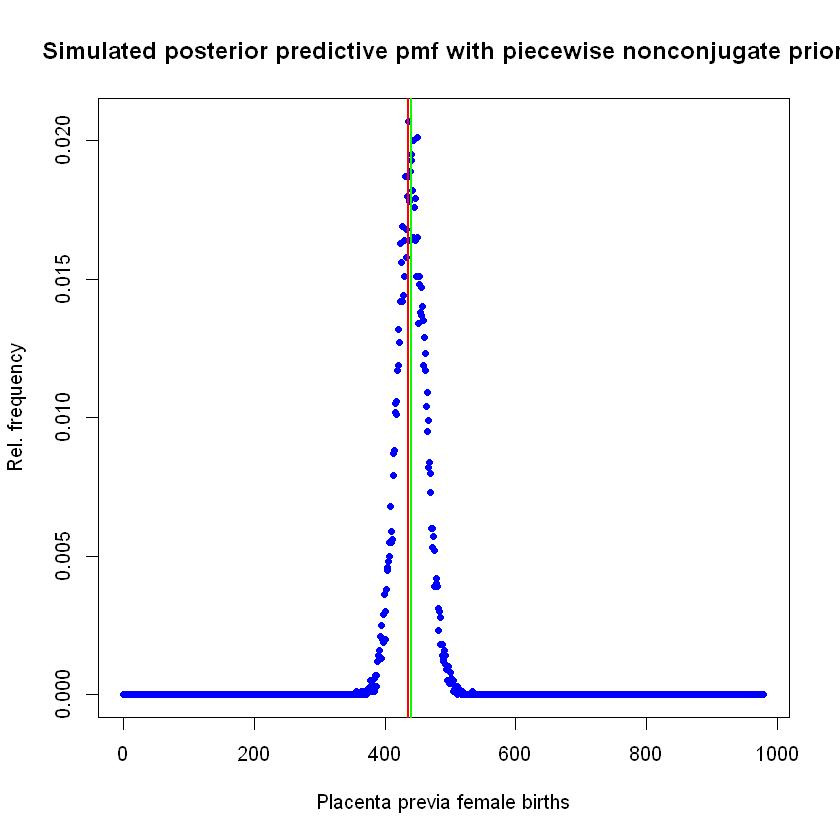

In [12]:
# Empirical pmf
X <- 0:980
F<-rep(0,length(X))

for (i in X){
    F[i]<-sum(x==X[i])
    }
f<-F/n

plot(X, f, type="p", pch=19, cex=0.8, col="blue",
    main="Simulated posterior predictive pmf with piecewise nonconjugate prior", 
    xlab='Placenta previa female births', ylab="Rel. frequency")

medians <- median(x)

mode_values <- Mode(x)
abline(v=mode_values,lwd = 2, col = 'red') # Mode

mean_values <- mean(x)
abline(v=mean_values,lwd = 2, col = 'green') # Mean

sdev <- sd(x)

In [10]:
print(paste("The mean is:", mean(x)))
print(paste("The mode is:", Mode(x)))
print(paste("The median is:", median(x)))
print(paste("The standard deviation is:", sd(x)))

[1] "The mean is: 440.3507"
[1] "The mode is: 441"
[1] "The median is: 440"
[1] "The standard deviation is: 21.8987092052588"


##### B) Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$

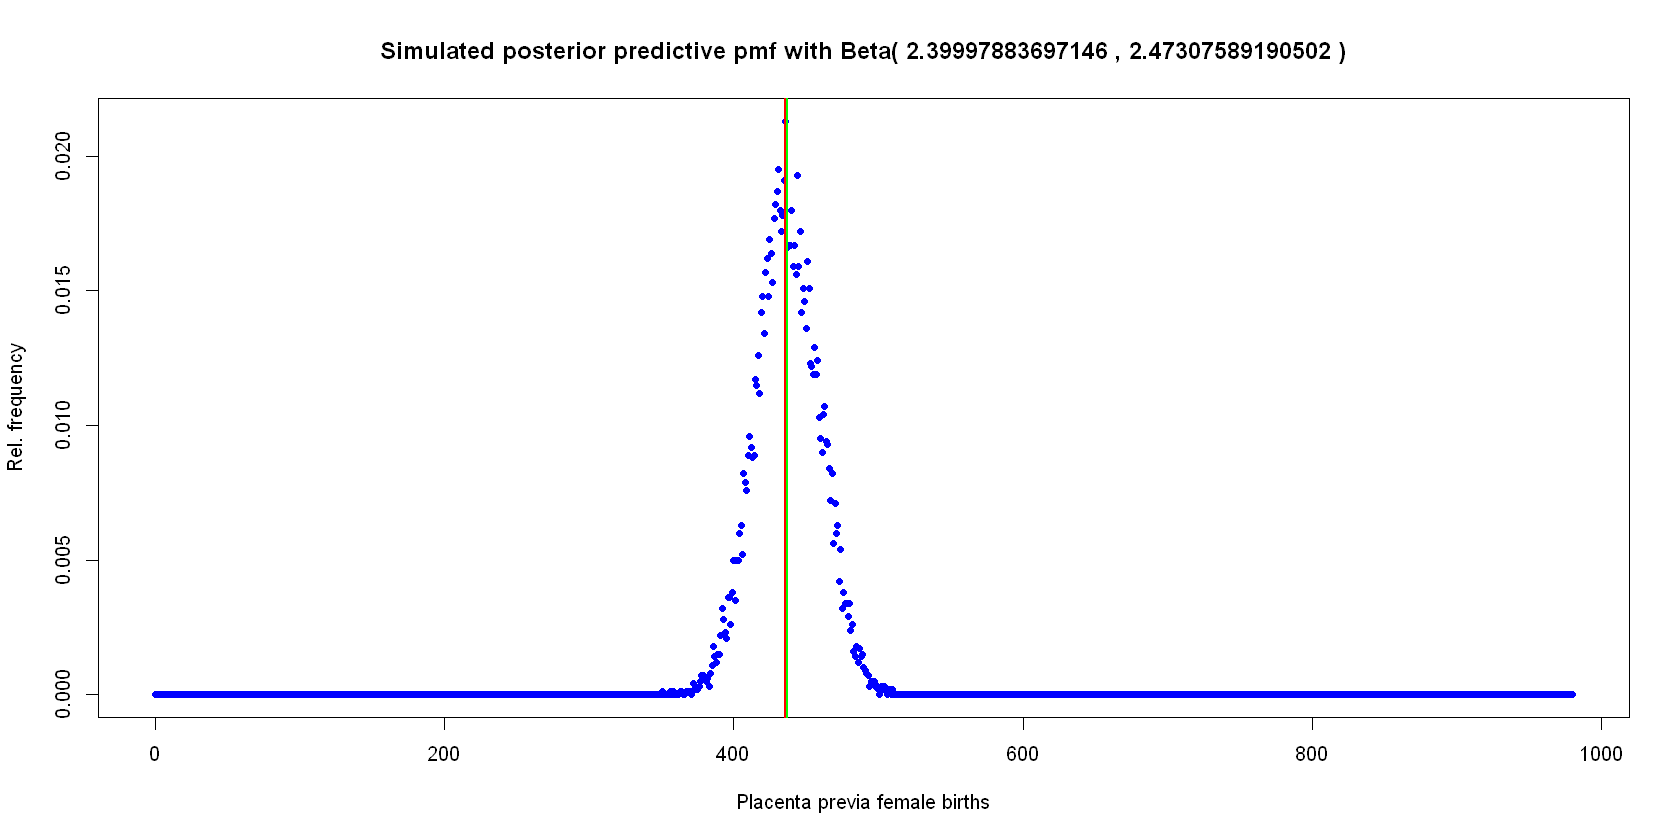

In [26]:
n<-10000
thetas <- rbeta(n, alpha_0 + 437, beta_0 + 980-437) # posterior distribution 
x <- rbinom(n,980,thetas) #sample from the posterior distribution

# Empirical pmf
X <- 0:980
F<-rep(0,length(X))

for (i in X){
    F[i]<-sum(x==X[i])
    }
f<-F/n

plot(X, f, type="p", pch=19, cex=0.8, col="blue",
    main = paste("Simulated posterior predictive pmf with Beta(", alpha_0, ",", beta_0, ")"), 
    xlab='Placenta previa female births', ylab="Rel. frequency")

medians <- median(x)

mode_values <- Mode(x)
abline(v=mode_values,lwd = 2, col = 'red') # Mode

mean_values <- mean(x)
abline(v=mean_values,lwd = 2, col = 'green') # Mean

sdev <- sd(x)



In [27]:
print(paste("The mean is:", mean(x)))
print(paste("The mode is:", Mode(x)))
print(paste("The median is:", median(x)))
print(paste("The standard deviation is:", sd(x)))

[1] "The mean is: 437.1812"
[1] "The mode is: 436"
[1] "The median is: 437"
[1] "The standard deviation is: 21.8790044481819"


The results are very similar meaning that the nonconjugate and beta prior have similar effects on predicting outcome for new populations

### Solution to Exercise 2: Asthma mortality

This exercise pertains to `Poisson.01.pub.ipynb` (lecture 7). Review this notebook as well as the notes concerning the Poisson model and do the following:

 1. Generate a sample from the prior predictive distribution.
 
 2. Generate a sample from the posterior predictive distribution after the first experiment (with $y=3$ after one year in a population of 200,000). 

In both cases plot the simulated pmf and compare it with the theoretical one and estimate the probability of having more than 25 fatalities in the next 10 years (assuming all other conditions remain constant).

In [2]:
# Prior gamma(3,5)
alpha<-3
beta<-5

# To generate a sample from the prior predictive distribution we generate a bunch of possible thetas and then p(x|theta)
sample_size <- 10000
prior_thetas <- rgamma(sample_size, shape = alpha, rate = beta) # here we generate a possible values for thetas

# Now we generate sample for any prior_thetas we have
prior_predictive_samples <- rpois(10000, lambda = 2*prior_thetas) 

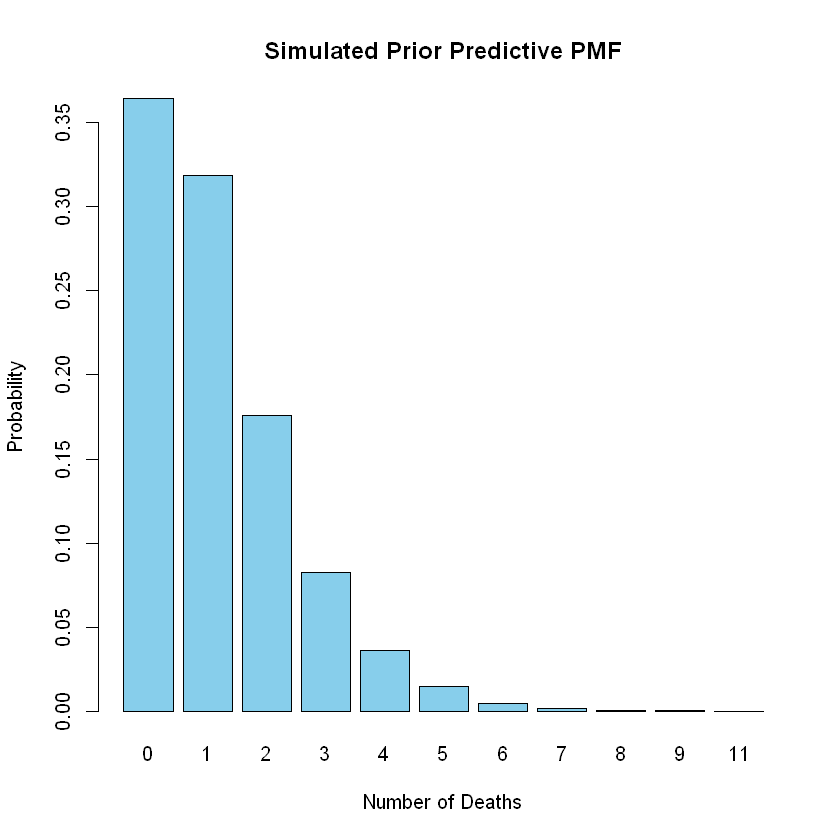

In [3]:
# We count the occurence and then normalize to obtain the probability.
prior_predictive_counts <- table(prior_predictive_samples)

#normalization
prior_predictive_pmf <- prior_predictive_counts / sum(prior_predictive_counts)

barplot(prior_predictive_pmf, xlab = "Number of Deaths", ylab = "Probability", 
        main = "Simulated Prior Predictive PMF", col = "skyblue")


Comparing with the theoretical one, which is 
$$
    p(x)=\int_0^{\infty} \text{Poisson}(x|2\theta)\cdot \text{Gamma}(\theta|3,5)d\theta
$$
because our prior distribution is $\text{Gamma}(\theta|3,5)$ and the likelihood function, i.e., $p(x|\theta)$ we assume to be a Poisson. Let us now derive the formula to get the prior distribution. First of all we write 
$$
    p(x)=\int_0^{\infty} \frac{1}{\Gamma(\alpha)\cdot x!} \cdot (2\theta)^xe^{-2\theta} \cdot \beta^{\alpha}\theta^{\alpha-1}e^{\beta\theta} 
$$
which can be written as
$$
\frac{\beta^{\alpha}\cdot 2^x }{\Gamma(\alpha)\cdot x!}\int_0^{\infty} (\theta)^xe^{-2\theta} \cdot\theta^{\alpha-1}e^{\beta\theta} =\frac{\beta^{\alpha}\cdot 2^x }{\Gamma(\alpha)\cdot x!}\int_0^{\infty} \theta^{\alpha+x-1}e^{-\beta\theta-2\theta}
$$
The last integral is the kernel of a Gamma, hence the integral has a closed formula, which reduces our expression to
$$
\frac{\beta^{\alpha}\cdot 2^x }{\Gamma(\alpha)\cdot x!}\Gamma(\alpha+x)(\beta+2)^{-\alpha-x}=\binom{\alpha+x-1}{x} \Bigl(\frac{\beta}{\beta+2}\Bigr)^{\alpha}\cdot \Bigl(1-\frac{\beta}{\beta+2}\Bigr)^{x}
$$
which is negative binomial with parameter size $r=\alpha$ and probability $\displaystyle p=\frac{\beta}{\beta+2}$


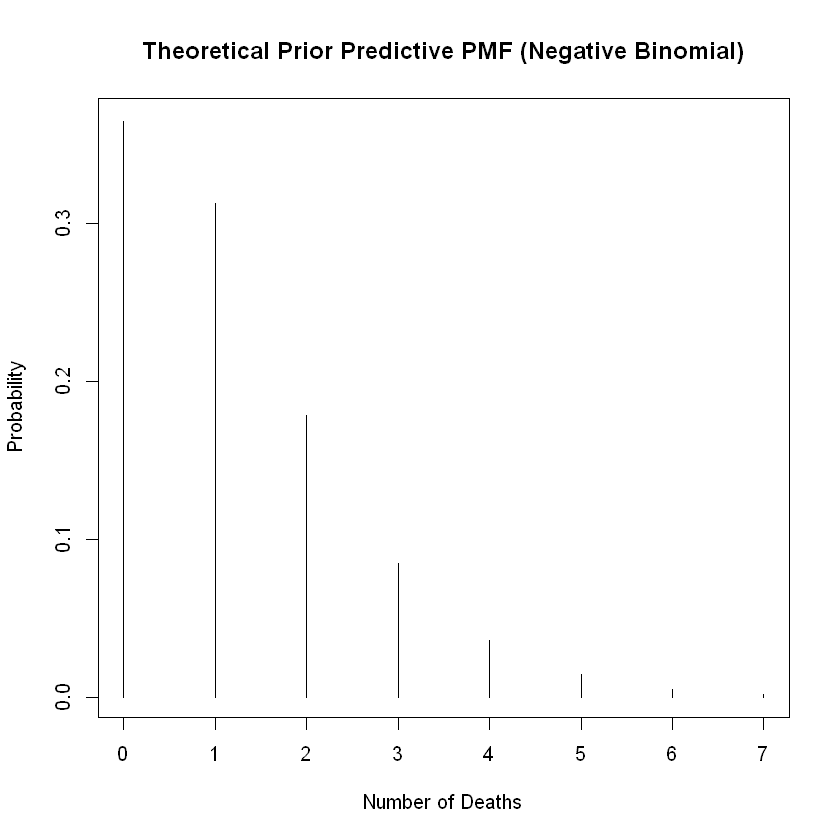

In [4]:
# Define the values of y for which to compute the prior predictive pmf
y_values <- 0:7

# Compute the prior predictive pmf using the negative binomial density
prior_predictive_pmf_theoretical <- dnbinom(y_values, size = 3, prob = beta/(beta+2))  # write formulas

# Plot the prior predictive pmf
plot(y_values, prior_predictive_pmf_theoretical, type = "h", 
     xlab = "Number of Deaths", ylab = "Probability",
     main = "Theoretical Prior Predictive PMF (Negative Binomial)")


Now let us move to the second part of the exercise: sampling from the posterior predictive distribution after the first experiment (with $y=3$ after one year in a population of 200,000). 


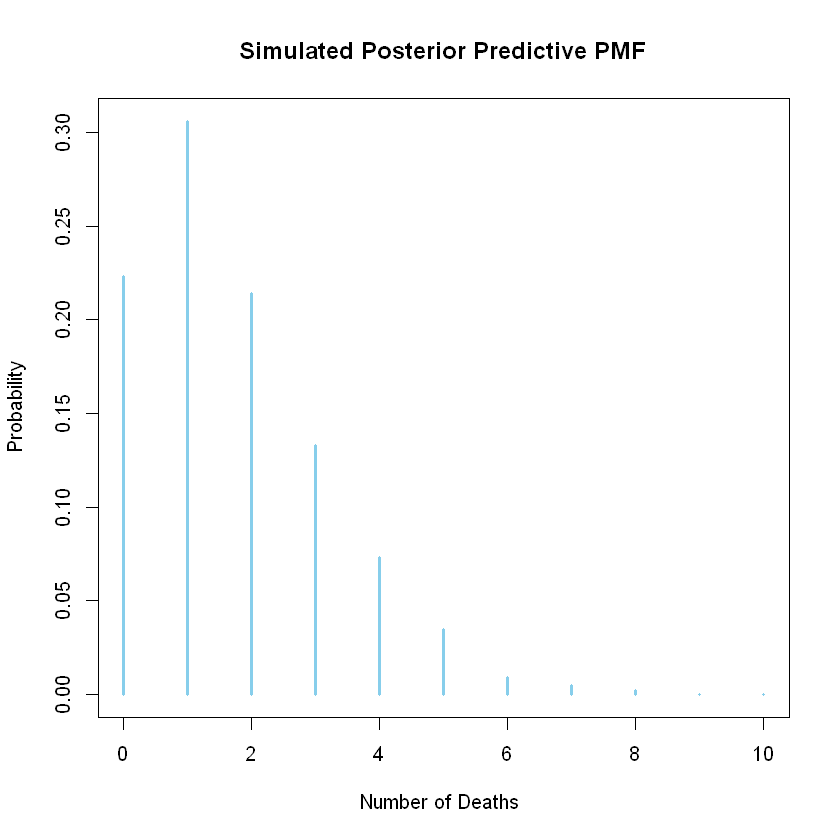

In [5]:
# First of all let us produce the simulated posterior predictive distribution: the posterior distribution of theta is Gamma(alpha+x, beta+y) hence Gamma(6,7)
sample_size<-1000

posterior_theta_samples <- rgamma(sample_size, shape = 6, rate = 7) # According to BDA 3
n<-10
posterior_predictive_pmf <- rep(0, n + 1)

# We generate in this case p(x|theta) where theta comes from the posterior. We generate just one sample
for (i in 1:sample_size) {
  y_given_theta <-rpois(1, lambda = 2 * posterior_theta_samples[i])
  posterior_predictive_pmf[y_given_theta + 1] <- posterior_predictive_pmf[y_given_theta + 1] + 1
}

# Normalization
posterior_predictive_pmf <- posterior_predictive_pmf / sum(posterior_predictive_pmf)
plot(0:n, posterior_predictive_pmf, type = "h", lwd = 3, col = "skyblue", main = "Simulated Posterior Predictive PMF", xlab = "Number of Deaths ", ylab = "Probability")

Now, we have to compute the posterior predictive pmf. The formula for it is 
$$
\int_0^{\infty} p(\tilde{x}|\theta)\cdot p(\theta|x)
$$
where we recall that the posterior distribution is a $Gamma(\alpha_1,\beta_1)$ where $\alpha_1=\alpha+y$ and $\beta_1=\beta+x$. Now, having this in mind, let us compute the integral which equal to 
$$
\int_0^{\infty} \frac{e^{-2\theta}(2\theta)^{\tilde{x}}}{\tilde{x}!} \cdot \frac{\beta_1^{\alpha_1}}{\Gamma(\alpha_1)} \theta^{\alpha_1-1} e^{-\theta(\beta_1)}
$$
which again, with analogous computation reduces to
$$
\frac{\beta_1^{\alpha_1}\cdot 2^{\tilde{x}}}{\Gamma(\alpha_1)\cdot\tilde{x}!} \int_0^{\infty} \theta^{\alpha_1+\tilde{x}-1} e^{-\beta_1\theta-2\theta}.
$$
We observe that we are dealing with another kernel, so that now the integral becomes 
$$
\frac{\beta_1^{\alpha_1}\cdot 2^{\tilde{x}}}{\Gamma(\alpha_1)\cdot\tilde{x}!}\cdot \Gamma(\alpha_1+\tilde{x})(\beta_1+2)^{-\alpha_1-\tilde{x}}
$$
And so now proceeding in a complete analogy we have a negative binomial with parameters $r=\alpha_1$ and $\displaystyle p=\frac{\beta_1}{\beta_1+2}$

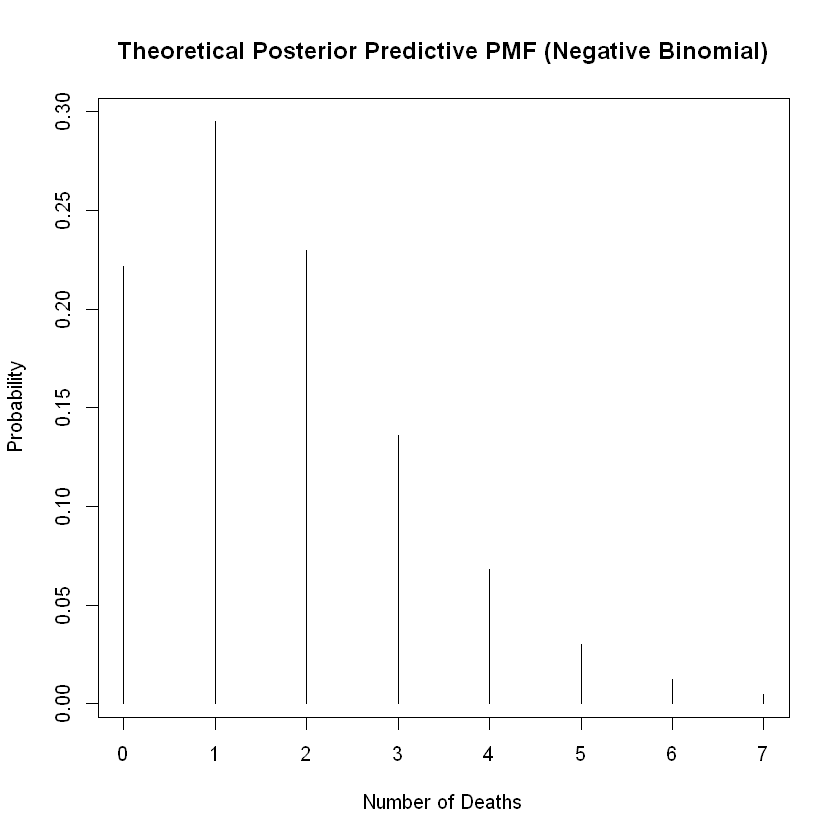

In [1]:
y_values <- 0:7
alpa_1=6
beta_1=7
# Compute the posterior predictive pmf using the negative binomial density
posterior_predictive_pmf_theoretical <- dnbinom(y_values, size = alpa_1, prob = (beta_1)/(beta_1+2))


plot(y_values, posterior_predictive_pmf_theoretical, type = "h", 
     xlab = "Number of Deaths", ylab = "Probability",
     main = "Theoretical Posterior Predictive PMF (Negative Binomial)")


Now let us compute the probability of having more than 25 fatalities in the 10 years. We assume all the other information to remain constant. One interesting approximation could be the following: from the simulated posterior predictive pmf we have, in a year, the probabilities of having a certain amount of deaths. Since we are using a Poisson distribution, which describes independent events we can do the following: we generate, according to these probabilities $10$ realisations of the random variabile with these probabilities, we sum all the final risult and count the how many times our sum is bigger than $26$

In [6]:
prob_approx= round(posterior_predictive_pmf,3)
values <- 0:(length(prob_approx)-1)

n_attempts<-100000
death <- rep(0,n_attempts)
count <- 0

for (i in 1:n_attempts){
    samples <- sample(values, size = 10, prob = prob_approx, replace = TRUE)
    death[i] <- sum(samples)
    if ((death[i])>=26){
        count<- count+1
    }
}

In [7]:
print(paste("The probability of having more than 25 deaths in 10 years with the posterior is :",count/n_attempts))

[1] "The probability of having more than 25 deaths in 10 years with the posterior is : 0.04336"


In [10]:
prob_approx= round(prior_predictive_pmf,3)
values <- 0:(length(prob_approx)-1)

n_attempts<-100000
death <- rep(0,n_attempts)
count <- 0

for (i in 1:n_attempts){
    samples <- sample(values, size = 10, prob = prob_approx, replace = TRUE)
    death[i] <- sum(samples)
    if ((death[i])>=26){
        count<- count+1
    }
}

In [11]:
print(paste("The probability of having more than 25 deaths in 10 years with the prior is :",count/n_attempts))

[1] "The probability of having more than 25 deaths in 10 years with the prior is : 0.00208"


### References:

- https://vioshyvo.github.io/Bayesian_inference/index.html Book for bayesian Inference
- Lecutes and notebooks: in particular Simulation.01, Binomial.03.Placenta, Poisson.01.pub, Binomial.model.slides.01
- BDA3 http://www.stat.columbia.edu/~gelman/book/BDA3.pdf
- https://sufficientlyminimal.netlify.app/2017/11/16/gamma-poisson/ results on conjugate pairs for Gamma-Poisson